# Image Processing J-comp

**Dataset:** Fashion mnist

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

The classes are:

0 => T-shirt/top

1 => Trouser

2 => Pullover

3 =>Dress

4 => Coat

5 => Sandal

6 => Shirt

7 => Sneaker

8 => Bag

9 => Ankle boot

**Link to Dataset:**

https://keras.io/api/datasets/fashion_mnist/

**link to GAN.ipynb**

https://colab.research.google.com/drive/1S8L8Y81YDdl_7P9wsDgk72ualuCSYOta?usp=sharing


KNN

In [ ]:
from keras.datasets.mnist import load_data
(trainX, trainy), (testX, testY) = load_data()
Xtrain = trainX.astype('float32')
Xtrain = (Xtrain - 127.5) / 127.5
Xtest = testX.astype('float32')
Xtest = (Xtest - 127.5) / 127.5
Xtrain=Xtrain.reshape(Xtrain.shape[0],784)
Xtest=Xtest.reshape(Xtest.shape[0],784)
print(Xtest.shape, testY.shape)

11501568/11490434 [==============================] - 0s 0us/step
(10000, 784) (10000,)


In [ ]:
Xtrain[40000]

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.  

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

knn.fit(Xtrain, trainy)

y_pred = knn.predict(Xtest[1:10])
y_pred

array([2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [ ]:
testY[1:10]

array([2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [ ]:
distances, indices = knn.kneighbors(Xtrain)
indices

array([[    0, 32248,  8728, 18932, 30483],
       [    1,   639, 51121, 59187, 31059],
       [    2, 54197, 46128,  4410, 25670],
       ...,
       [59997, 49032,  3188, 28340, 54862],
       [59998, 57075, 29971, 45447, 29221],
       [59999, 24241, 52171,  1013, 31399]])

In [ ]:
distances

array([[ 0.       , 12.246842 , 12.483149 , 12.507601 , 12.5232115],
       [ 0.       ,  8.005077 ,  8.631603 ,  8.827328 ,  8.828952 ],
       [ 0.       , 10.804946 , 12.087272 , 12.186868 , 12.440731 ],
       ...,
       [ 0.       ,  8.254588 ,  8.782969 , 10.297119 , 10.437192 ],
       [ 0.       ,  8.66012  ,  8.950896 ,  9.951971 , 10.055113 ],
       [ 0.       ,  8.178576 ,  9.249736 , 10.51003  , 11.0907755]],
      dtype=float32)

In [ ]:
for x in range(0,4):
  print(indices[x][0]," - ",indices[x][1]," => ",distances[x][1])


0  -  32248  =>  12.246842
1  -  639  =>  8.005077
2  -  54197  =>  10.804946
3  -  23  =>  3.290848


# knn for fashion-mnist

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

In [ ]:
from keras.datasets.fashion_mnist import load_data
(trainX, trainy), (testX, testY) = load_data()

4431872/4422102 [==============================] - 0s 0us/step


Preparing the dataset


In [ ]:
trainX=trainX.reshape(trainX.shape[0],784)
testX=testX.reshape(testX.shape[0],784)

In [ ]:
df1=pd.DataFrame(trainX)
df1['labels']=trainy
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,labels
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,41,188,103,54,48,43,87,168,133,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,49,136,219,216,228,...,240,243,214,224,162,0,2,0,0,0,0,0,0,0,0,0,1,0,0,139,146,130,135,135,137,125,124,125,121,119,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,118,24,0,0,0,0,0,48,88,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,100,212,205,...,102,75,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,42,57,56,32,8,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,175,156,64,14,54,137,204,194,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,186,177,183,175,188,...,152,85,160,133,100,12,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,35,4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,206,187,32,...,242,255,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,102,168,25,0,139,161,74,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
59996,0,0,0,0,0,0,0,0,0,0,15,131,87,95,97,106,95,115,109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67,252,...,144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,134,124,0,0,160,80,0,0,0,0,0,0,0,0,0,0,1
59997,0,0,0,0,0,0,0,0,0,5,15,0,0,0,0,0,0,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,225,218,21,...,208,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,153,194,206,222,223,209,201,56,0,0,0,0,0,0,0,0,0,0,3
59998,0,0,0,0,0,0,0,0,0,0,17,191,159,79,85,158,191,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,65,96,107,77,...,71,66,51,67,7,0,1,0,0,0,0,0,0,0,0,0,0,11,54,55,61,65,69,67,67,66,63,66,69,66,54,50,5,0,1,0,0,0,0,0


In [ ]:
df2=pd.DataFrame(testX)
df2['labels']=testY
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,labels
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,0,0,0,0,0,13,67,0,0,0,0,50,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,120,209,226,247,...,0,0,0,0,39,249,255,123,0,0,0,0,0,0,0,49,205,197,11,0,4,1,2,2,2,2,2,2,2,2,3,0,3,174,189,67,0,0,0,2
2,0,0,0,0,0,0,0,0,1,0,67,177,129,153,117,129,146,141,175,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,196,255,...,255,252,119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,98,159,71,0,0,68,176,164,58,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,21,123,108,99,99,84,83,86,92,70,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106,248,230,...,248,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,174,101,0,0,0,146,146,1,0,0,0,0,0,0,0,0,0,1
4,0,0,0,2,0,1,1,0,0,0,0,57,67,73,76,76,83,62,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,13,79,128,201,...,174,197,182,162,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,72,95,109,111,111,106,101,71,12,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
9996,0,0,0,0,0,0,0,0,0,31,52,98,94,86,94,84,53,89,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93,178,196,...,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,149,59,0,0,57,137,91,0,0,0,0,0,0,0,0,0,0,1
9997,0,0,0,0,0,0,0,0,0,0,0,0,0,30,69,37,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,221,229,173,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,99,117,135,137,135,120,101,27,0,0,0,0,0,0,0,0,0,8
9998,0,0,0,0,0,0,0,0,0,0,0,164,137,130,93,136,138,159,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,...,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,206,85,0,94,202,14,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df=pd.concat([df1,df2])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,labels
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,41,188,103,54,48,43,87,168,133,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,49,136,219,216,228,...,240,243,214,224,162,0,2,0,0,0,0,0,0,0,0,0,1,0,0,139,146,130,135,135,137,125,124,125,121,119,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,118,24,0,0,0,0,0,48,88,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,100,212,205,...,102,75,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,42,57,56,32,8,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,175,156,64,14,54,137,204,194,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,186,177,183,175,188,...,152,85,160,133,100,12,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,35,4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,206,187,32,...,242,255,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,102,168,25,0,139,161,74,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
9996,0,0,0,0,0,0,0,0,0,31,52,98,94,86,94,84,53,89,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93,178,196,...,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,149,59,0,0,57,137,91,0,0,0,0,0,0,0,0,0,0,1
9997,0,0,0,0,0,0,0,0,0,0,0,0,0,30,69,37,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,221,229,173,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,99,117,135,137,135,120,101,27,0,0,0,0,0,0,0,0,0,8
9998,0,0,0,0,0,0,0,0,0,0,0,164,137,130,93,136,138,159,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,...,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,206,85,0,94,202,14,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
Counter(df['labels'])

Counter({0: 7000,
         1: 7000,
         2: 7000,
         3: 7000,
         4: 7000,
         5: 7000,
         6: 7000,
         7: 7000,
         8: 7000,
         9: 7000})

Making the perfectly balanced dataset to imbalanced dataset

In [ ]:
from numpy.random import randint
n=7000
d=[]
for i in range(10):
  X_with_class = df[df['labels'] == i]
  if i==0 or i==4 or i==8:
    ix = randint(0, len(X_with_class), 869)
  else:
    ix = randint(0, len(X_with_class), n)
  print(ix)
  [d.append(X_with_class.iloc[j]) for j in ix]

[6632 2191 1449 6378 5005 3385 3137  706 3768 3127 6787 3815  798 3724
 1510 3055 1115 3958 4818  816  270 1500 5983 4008 3733 5998 6359 5162
 6086 5215 3417 3630 1196 2914 5536 1213 4321 1409 4604 1152 5344  809
 6336 2743 3374 3234 1859 4983 4159 1571 5947 6989 6095 2822 4912 4102
 6908 2756 1345 4285 4494 6848 4716 4221 3049 4556 5612  825 6206 1840
 4317 6627 2730 5426 2522 2479 1167 3601 3107 5554 2899 4094 2259 2643
 3315 4368 6591 2564 2982 2672 6355 1042 1028  623 3466 1822 4104 5407
 3639 3926 3071 5722  432 2662  275 3530 1798 5511  525 5337  706 5631
 4775 1071 2195 5380 2289 3388 6706  114 2984  304 5865 4877 5878 6866
 1134 3695 4036 4679 3826 3184 6323 1318 2456  153 5270 2296 6195 3358
 4392 4845 6074 4105  595 1454 1856 5145 2515 5974 3213  523 1512 6291
 4461 2772 4718 6466 1447  240 1082 1351  946 6489 2898 3996 4262 4085
 3805  669   22 2050 3081 4912 6514   57 5837 6500 6685 3896 1074 6598
  346 2950 2070  220 1369 6759 6045  135  799 3494 4329 1977 4095 6942
 4654 

In [ ]:
d=pd.DataFrame(d)
d

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,labels
6460,0,0,0,0,0,0,0,0,0,0,51,123,63,75,73,79,106,13,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,14,82,147,198,222,...,182,175,184,162,0,0,1,0,0,0,0,0,0,0,0,0,2,0,50,96,75,81,80,79,88,88,80,75,64,55,44,29,0,1,0,0,0,0,0,0
22488,0,0,0,0,0,0,0,0,0,53,66,4,0,0,0,0,91,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,86,150,154,152,181,...,123,124,146,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,43,91,90,90,80,75,66,57,69,79,85,72,80,0,0,1,0,0,0,0,0,0
15011,0,0,0,0,0,0,0,49,60,170,177,32,0,0,0,0,21,152,168,79,42,0,0,0,0,0,0,0,0,0,0,0,2,0,51,135,91,65,198,201,...,93,88,81,98,102,0,0,0,0,0,0,0,0,0,0,0,0,42,49,56,60,65,65,65,70,74,77,79,67,67,63,72,58,0,0,2,0,0,0,0
3752,0,0,0,0,0,0,0,0,30,183,246,182,154,152,152,146,170,212,156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,140,249,255,253,245,255,...,255,248,250,86,0,7,0,0,0,0,0,0,0,0,0,0,1,0,0,33,106,154,203,231,228,222,219,210,170,136,52,0,0,1,0,0,0,0,0,0
50231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,54,46,28,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2664,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
53333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
22176,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
34301,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9


In [ ]:
Counter(d['labels'])

Counter({0: 869,
         1: 7000,
         2: 7000,
         3: 7000,
         4: 869,
         5: 7000,
         6: 7000,
         7: 7000,
         8: 869,
         9: 7000})

Converting pixels [0-255] to [-1 to 1]

In [ ]:
from keras.datasets.fashion_mnist import load_data
(trainX, trainy), (testX, testY) = load_data()
Xtrain = trainX.astype('float32')
Xtrain = (Xtrain - 127.5) / 127.5
Xtest = testX.astype('float32')
Xtest = (Xtest - 127.5) / 127.5
Xtrain=Xtrain.reshape(Xtrain.shape[0],784)
Xtest=Xtest.reshape(Xtest.shape[0],784)
print(Xtest.shape, testY.shape)

(10000, 784) (10000,)


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

knn.fit(Xtrain, trainy)

y_pred = knn.predict(Xtest)
y_pred

array([9, 2, 1, ..., 8, 1, 7], dtype=uint8)

In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy of test data: %.3f' % accuracy_score(testY, y_pred))

Accuracy of test data: 0.855


# Semi-supervised gan for fashion mnist

In [ ]:
X=d.iloc[:,:-1]
y=d.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


(41285, 28, 28, 1) (41285,)
(100, 28, 28, 1) (100,)
--------------- Epoch 0 ---------------


100%|██████████| 100/100 [06:40<00:00,  4.00s/it]


Prediction of fake examples -  [1 0 8 4 9 2 1 3 2 4 5 1 1 2 2 9 8 1 8 8 2 2 2 1 3 5 2 2 3 3 9 5 8 5 4 5 3
 3 3 7 1 4 2 7 3 4 1 0 1 4 6 1 8 2 1 5 3 1 2 2 1 9 1 3 1 1 7 2 1 5 8 5 5 0
 0 5 0 5 6 5 1 1 1 4 3 2 0 1 3 2 5 5 6 4 1 1 3 0 3 1] 100

Prediction by knn -  [1 0 6 4 9 2 1 3 2 4 2 1 1 2 2 9 8 1 4 9 4 4 4 1 6 9 4 4 0 0 9 9 8 2 4 6 0
 0 6 7 1 4 4 7 4 4 1 0 1 4 6 0 4 2 1 7 3 1 4 6 1 7 3 3 1 1 7 4 3 7 7 7 5 1
 1 7 3 7 4 7 1 1 1 4 4 6 3 1 0 2 6 7 6 4 1 1 0 1 0 1] 
shape= (100, 784)
knn Classifier Accuracy: 51.000%
distance= 11.450457
len(lm)= 12
y -  [5 5 5 ... 1 6 6]
Prediction -  [9 5 5 ... 1 4 4]
Classifier Accuracy: 68.502%


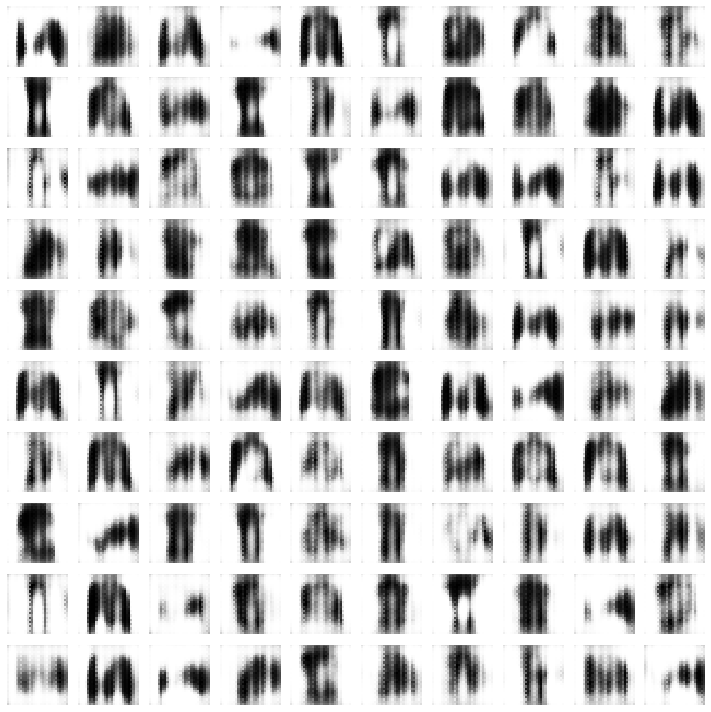

Performance of Epoch 0, c[0.716,78], d[0.664,0.742], g[0.996]

--------------- Epoch 1 ---------------


100%|██████████| 100/100 [06:36<00:00,  3.97s/it]


--------------- Epoch 2 ---------------


100%|██████████| 100/100 [06:36<00:00,  3.97s/it]


--------------- Epoch 3 ---------------


100%|██████████| 100/100 [06:38<00:00,  3.99s/it]


--------------- Epoch 4 ---------------


100%|██████████| 100/100 [06:38<00:00,  3.99s/it]


--------------- Epoch 5 ---------------


100%|██████████| 100/100 [06:39<00:00,  4.00s/it]


Prediction of fake examples -  [5 9 5 0 2 7 3 2 7 1 3 8 5 3 5 6 7 5 0 2 9 7 5 5 2 5 7 3 5 5 5 9 9 7 8 4 3
 9 5 2 3 9 8 5 0 5 7 5 9 2 5 6 1 2 6 2 9 5 5 5 3 5 7 2 9 6 1 7 2 9 1 9 3 9
 9 3 3 0 9 3 5 3 9 6 0 5 5 7 9 2 5 0 7 5 5 3 3 2 3 2] 100

Prediction by knn -  [7 6 7 0 3 7 6 2 7 6 4 6 7 3 7 6 6 5 2 3 6 6 7 7 2 5 7 3 7 7 7 5 3 7 4 2 3
 5 5 2 3 6 8 5 0 6 7 7 9 4 5 6 7 6 3 6 7 7 7 7 3 7 5 6 9 0 0 8 6 5 3 9 3 6
 6 3 6 0 7 3 7 3 5 0 6 5 7 7 5 5 5 0 7 7 7 3 3 6 0 6] 
shape= (100, 784)
knn Classifier Accuracy: 38.000%
distance= 10.708126
len(lm)= 17
y -  [5 5 5 ... 1 6 6]
Prediction -  [9 9 5 ... 1 4 4]
Classifier Accuracy: 66.884%


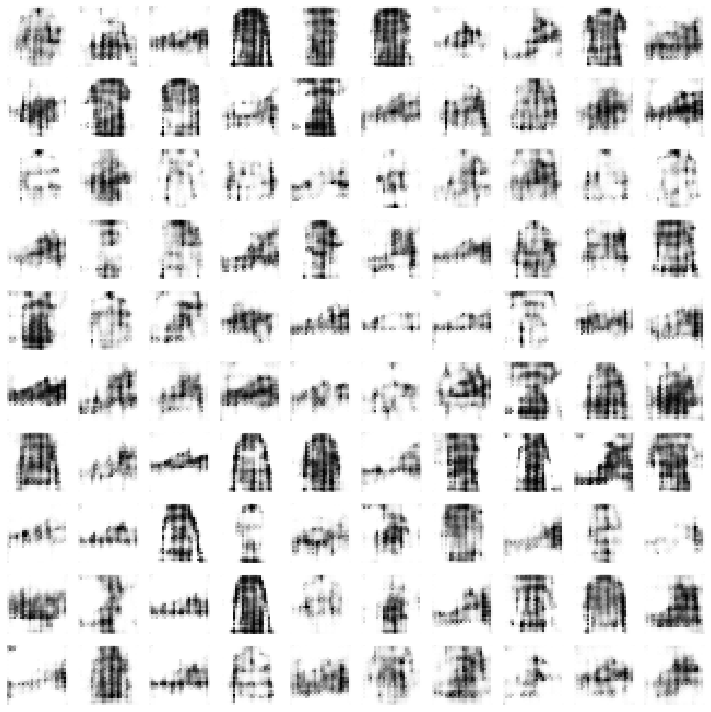

Performance of Epoch 5, c[0.060,100], d[0.455,0.534], g[1.725]

--------------- Epoch 6 ---------------


100%|██████████| 100/100 [06:37<00:00,  3.97s/it]


--------------- Epoch 7 ---------------


100%|██████████| 100/100 [06:34<00:00,  3.95s/it]


--------------- Epoch 8 ---------------


100%|██████████| 100/100 [06:31<00:00,  3.92s/it]


--------------- Epoch 9 ---------------


100%|██████████| 100/100 [06:31<00:00,  3.91s/it]


--------------- Epoch 10 ---------------


100%|██████████| 100/100 [06:30<00:00,  3.90s/it]


Prediction of fake examples -  [7 4 2 3 4 3 2 2 3 3 6 7 2 2 2 5 4 2 9 3 7 9 6 2 9 0 0 5 4 5 5 0 7 3 6 7 4
 2 9 2 7 8 4 2 4 3 7 8 7 3 7 0 8 4 4 2 6 3 9 5 3 7 5 3 3 7 4 2 9 0 5 0 8 3
 3 5 9 5 2 4 7 3 5 5 3 3 6 7 7 5 0 3 9 9 6 4 2 2 8 5] 100

Prediction by knn -  [7 4 2 4 3 0 2 6 3 3 6 9 2 2 2 7 4 6 9 1 7 9 6 2 9 0 0 5 4 7 7 0 8 3 6 9 6
 2 9 2 9 8 4 2 4 3 7 4 9 7 7 0 2 4 4 2 0 2 9 7 0 9 6 0 3 7 4 2 9 0 7 0 6 3
 3 7 7 5 2 2 7 3 5 7 0 3 6 7 7 7 0 3 9 9 6 4 2 2 8 7] 
shape= (100, 784)
knn Classifier Accuracy: 66.000%
distance= 8.5803175
len(lm)= 35
y -  [5 5 5 ... 1 6 6]
Prediction -  [5 9 5 ... 1 4 6]
Classifier Accuracy: 69.861%


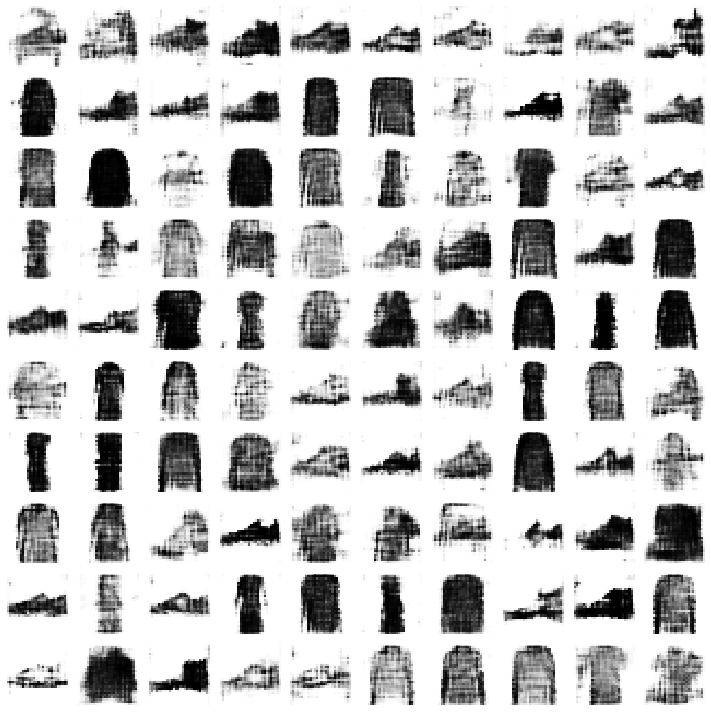

Performance of Epoch 10, c[0.030,100], d[0.783,0.803], g[1.217]

--------------- Epoch 11 ---------------


100%|██████████| 100/100 [06:39<00:00,  4.00s/it]


--------------- Epoch 12 ---------------


100%|██████████| 100/100 [06:36<00:00,  3.97s/it]


--------------- Epoch 13 ---------------


100%|██████████| 100/100 [06:35<00:00,  3.95s/it]


--------------- Epoch 14 ---------------


100%|██████████| 100/100 [06:32<00:00,  3.93s/it]


--------------- Epoch 15 ---------------


100%|██████████| 100/100 [06:32<00:00,  3.93s/it]


Prediction of fake examples -  [2 3 2 9 6 2 3 2 2 9 7 5 5 9 9 5 2 3 9 3 5 2 6 4 4 7 9 9 2 8 1 7 4 3 5 6 7
 9 9 5 0 4 2 9 3 5 7 3 3 2 2 3 9 2 9 3 9 7 5 4 3 0 9 2 9 9 2 0 2 5 3 5 6 5
 3 2 8 7 7 7 9 2 0 9 3 9 2 9 5 9 9 6 9 2 3 7 5 9 7 5] 100

Prediction by knn -  [2 3 2 9 6 2 0 2 7 9 7 7 5 9 7 5 2 3 5 3 6 4 6 6 2 7 9 2 2 3 1 5 4 3 7 6 7
 7 9 7 0 6 2 9 3 7 7 3 3 2 2 3 9 4 9 6 9 7 7 4 3 2 9 2 9 2 2 0 8 5 4 5 6 7
 6 2 8 7 7 7 2 2 3 6 3 6 2 9 7 9 7 0 9 2 3 8 5 9 7 7] 
shape= (100, 784)
knn Classifier Accuracy: 65.000%
distance= 7.4636016
len(lm)= 40
y -  [5 5 5 ... 1 6 6]
Prediction -  [5 9 5 ... 1 4 6]
Classifier Accuracy: 73.196%


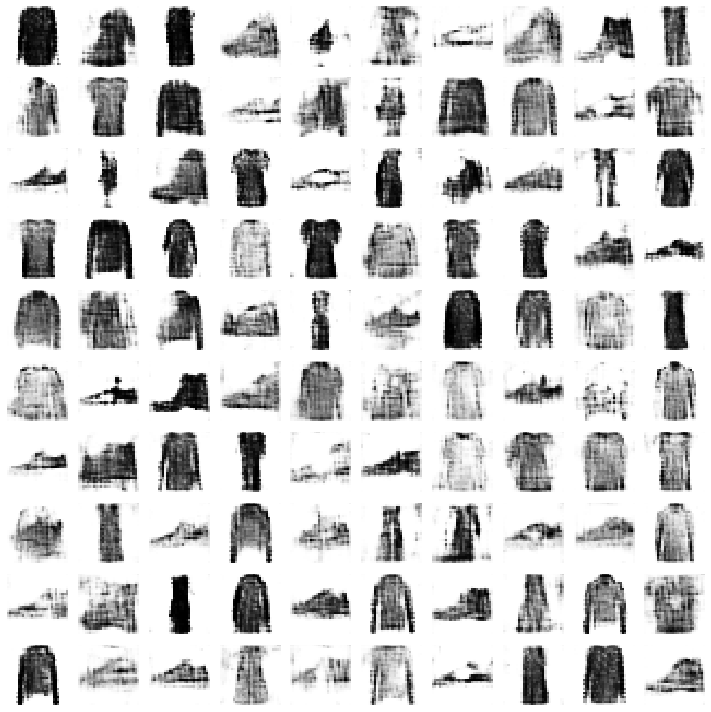

Performance of Epoch 15, c[0.020,100], d[0.692,0.686], g[1.048]

--------------- Epoch 16 ---------------


100%|██████████| 100/100 [06:34<00:00,  3.94s/it]


--------------- Epoch 17 ---------------


100%|██████████| 100/100 [06:34<00:00,  3.94s/it]


--------------- Epoch 18 ---------------


100%|██████████| 100/100 [06:34<00:00,  3.94s/it]


--------------- Epoch 19 ---------------


100%|██████████| 100/100 [06:34<00:00,  3.95s/it]


--------------- Epoch 20 ---------------


100%|██████████| 100/100 [06:35<00:00,  3.95s/it]


Prediction of fake examples -  [7 5 8 7 6 2 8 7 6 0 5 7 2 2 3 7 7 2 6 9 2 2 2 9 9 9 4 3 0 7 6 9 0 9 6 8 9
 2 0 0 4 5 7 4 9 5 9 9 0 3 0 6 7 0 2 6 3 3 3 1 3 4 3 4 9 4 3 9 7 1 9 7 9 7
 7 3 2 7 2 5 2 3 2 8 5 4 7 9 4 7 4 3 1 6 3 3 9 0 4 7] 100

Prediction by knn -  [7 5 2 7 6 2 2 7 6 0 5 7 2 2 3 7 7 2 4 9 2 2 2 9 9 9 4 6 0 7 2 9 0 5 6 8 9
 4 0 0 2 6 2 2 9 5 7 9 8 3 0 4 7 0 2 6 0 3 3 4 1 6 3 4 5 2 6 9 7 1 9 7 9 7
 9 0 2 7 2 5 2 3 2 4 6 4 7 9 0 7 4 3 1 6 3 6 9 0 2 7] 
shape= (100, 784)
knn Classifier Accuracy: 72.000%
distance= 9.271391
len(lm)= 53
y -  [5 5 5 ... 1 6 6]
Prediction -  [5 9 5 ... 1 6 6]
Classifier Accuracy: 71.534%


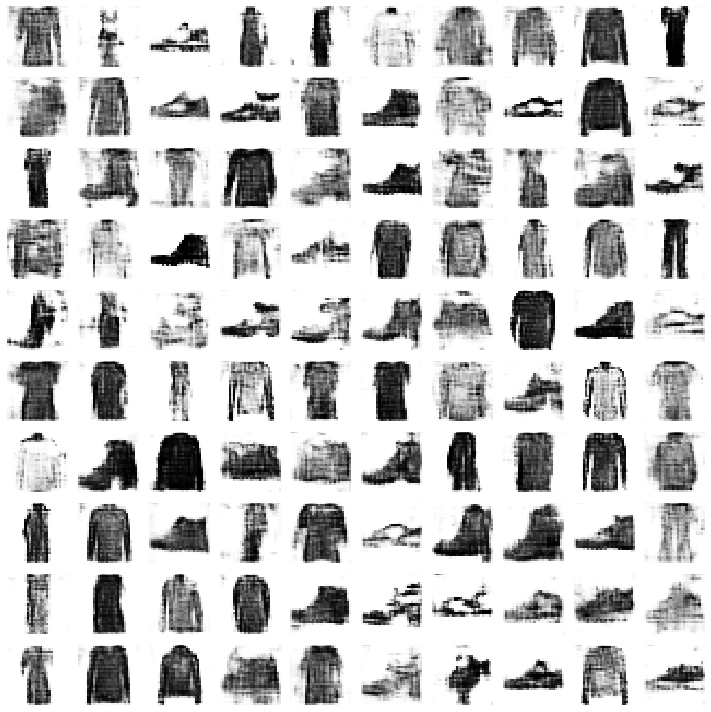

Performance of Epoch 20, c[0.011,100], d[0.695,1.040], g[1.030]

--------------- Epoch 21 ---------------


100%|██████████| 100/100 [06:35<00:00,  3.96s/it]


--------------- Epoch 22 ---------------


100%|██████████| 100/100 [06:38<00:00,  3.98s/it]


--------------- Epoch 23 ---------------


100%|██████████| 100/100 [06:35<00:00,  3.95s/it]


--------------- Epoch 24 ---------------


100%|██████████| 100/100 [06:35<00:00,  3.95s/it]


--------------- Epoch 25 ---------------


100%|██████████| 100/100 [06:32<00:00,  3.93s/it]


Prediction of fake examples -  [3 4 4 2 9 5 6 4 3 4 4 9 4 0 5 7 1 0 7 4 6 4 3 4 4 5 5 8 9 3 4 4 6 5 7 9 5
 8 3 5 7 1 1 2 8 7 4 0 4 4 3 5 3 3 3 8 3 3 5 7 2 8 7 6 4 0 9 7 5 3 4 3 5 3
 7 7 2 6 8 3 8 9 5 6 9 3 8 2 2 9 3 1 2 4 2 3 4 5 4 5] 100

Prediction by knn -  [1 2 2 2 9 7 0 2 0 2 4 9 4 0 5 7 3 0 7 4 6 4 3 2 4 9 7 8 9 3 2 2 4 7 7 9 2
 8 3 7 7 1 1 2 4 7 2 8 4 4 1 7 3 0 3 2 3 3 5 9 2 9 7 6 2 2 9 7 2 3 2 3 2 3
 7 9 2 6 8 4 8 9 5 6 9 3 2 2 6 9 4 1 2 4 6 4 4 9 4 9] 
shape= (100, 784)
knn Classifier Accuracy: 59.000%
distance= 6.9846473
len(lm)= 69
y -  [5 5 5 ... 1 6 6]
Prediction -  [5 5 5 ... 1 4 6]
Classifier Accuracy: 71.515%


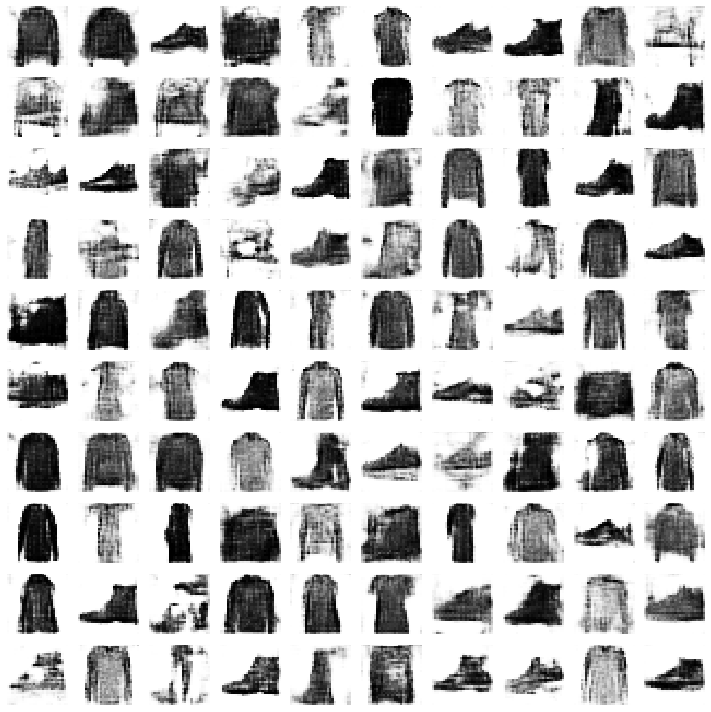

Performance of Epoch 25, c[0.007,100], d[0.751,0.686], g[1.174]

--------------- Epoch 26 ---------------


100%|██████████| 100/100 [06:38<00:00,  3.98s/it]


--------------- Epoch 27 ---------------


100%|██████████| 100/100 [06:34<00:00,  3.95s/it]


--------------- Epoch 28 ---------------


100%|██████████| 100/100 [06:34<00:00,  3.95s/it]


--------------- Epoch 29 ---------------


100%|██████████| 100/100 [06:33<00:00,  3.93s/it]


--------------- Epoch 30 ---------------


100%|██████████| 100/100 [06:32<00:00,  3.93s/it]


Prediction of fake examples -  [1 0 5 2 6 5 3 2 1 7 6 9 4 7 3 2 1 5 3 4 5 4 7 7 6 4 2 2 2 1 7 2 1 9 3 2 3
 3 1 9 3 4 3 7 0 7 2 7 2 3 1 7 2 3 7 6 0 4 0 7 9 9 7 0 5 3 2 3 3 7 9 7 3 7
 9 5 7 2 5 7 7 2 7 9 4 3 9 7 9 2 2 3 7 7 5 4 3 0 3 9] 100

Prediction by knn -  [1 1 7 2 6 7 4 2 1 5 6 9 4 7 3 6 3 7 0 6 7 6 7 7 6 2 4 2 2 1 7 6 1 9 4 2 6
 3 1 9 1 3 6 7 0 7 2 7 2 3 3 7 8 0 9 8 2 4 0 7 9 9 7 0 7 3 2 1 3 7 9 7 3 7
 9 5 7 2 7 9 9 6 7 9 4 0 9 7 9 6 6 1 7 7 5 6 3 0 3 9] 
shape= (100, 784)
knn Classifier Accuracy: 63.000%
distance= 6.905476
len(lm)= 76
y -  [5 5 5 ... 1 6 6]
Prediction -  [9 9 5 ... 1 4 6]
Classifier Accuracy: 70.265%


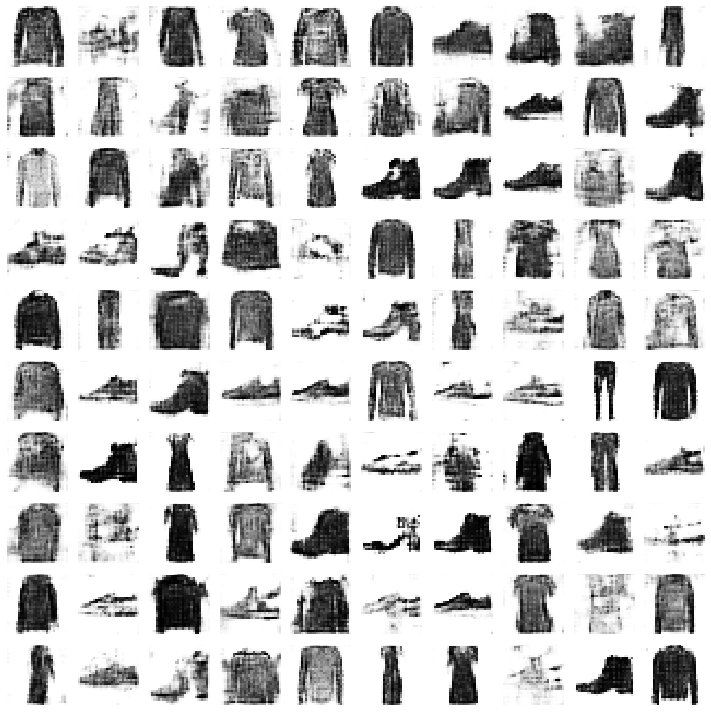

Performance of Epoch 30, c[0.006,100], d[0.739,1.015], g[0.936]

--------------- Epoch 31 ---------------


100%|██████████| 100/100 [06:35<00:00,  3.95s/it]


--------------- Epoch 32 ---------------


100%|██████████| 100/100 [06:33<00:00,  3.94s/it]


--------------- Epoch 33 ---------------


100%|██████████| 100/100 [06:33<00:00,  3.93s/it]


--------------- Epoch 34 ---------------


100%|██████████| 100/100 [06:32<00:00,  3.93s/it]


--------------- Epoch 35 ---------------


100%|██████████| 100/100 [06:31<00:00,  3.92s/it]


Prediction of fake examples -  [2 3 3 1 9 9 2 9 5 6 5 2 7 9 9 0 2 2 2 3 7 4 0 0 9 7 2 1 2 0 3 7 3 9 3 3 1
 9 5 3 0 3 9 4 0 3 9 9 5 5 3 3 0 2 4 9 1 7 9 4 4 3 3 7 3 2 9 6 7 4 7 9 2 7
 2 7 2 2 9 9 4 0 1 4 6 4 3 2 1 9 9 6 2 2 6 9 3 2 2 5] 100

Prediction by knn -  [2 3 3 1 6 9 2 5 7 6 5 2 7 9 5 0 4 2 6 3 7 4 6 0 9 7 2 1 2 6 3 7 3 9 4 3 1
 9 7 3 7 3 7 2 6 3 9 9 7 5 3 3 0 2 4 7 1 7 9 2 2 0 3 7 3 2 9 2 7 4 7 9 6 7
 2 7 2 6 7 9 6 0 1 4 6 6 4 4 1 9 9 4 2 6 6 9 3 2 6 5] 
shape= (100, 784)
knn Classifier Accuracy: 70.000%
distance= 9.91381
len(lm)= 84
y -  [5 5 5 ... 1 6 6]
Prediction -  [9 9 5 ... 1 4 6]
Classifier Accuracy: 71.147%


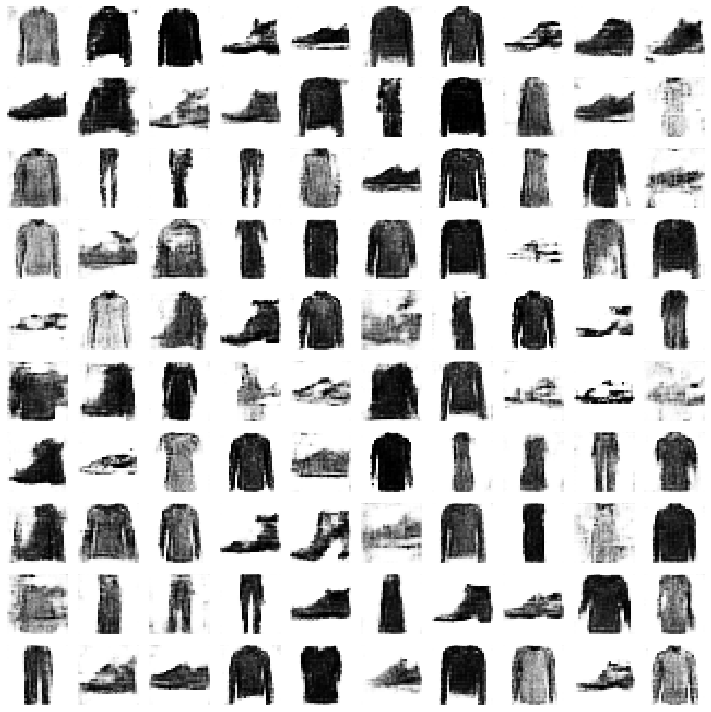

Performance of Epoch 35, c[0.011,100], d[0.697,0.797], g[1.046]

--------------- Epoch 36 ---------------


100%|██████████| 100/100 [06:33<00:00,  3.93s/it]


--------------- Epoch 37 ---------------


100%|██████████| 100/100 [06:33<00:00,  3.94s/it]


--------------- Epoch 38 ---------------


100%|██████████| 100/100 [06:31<00:00,  3.92s/it]


--------------- Epoch 39 ---------------


100%|██████████| 100/100 [06:31<00:00,  3.92s/it]


--------------- Epoch 40 ---------------


100%|██████████| 100/100 [06:31<00:00,  3.91s/it]


Prediction of fake examples -  [9 9 8 6 9 3 5 5 6 0 5 3 4 9 5 2 2 1 3 6 5 1 5 7 1 2 5 8 5 6 1 9 3 1 0 4 6
 3 0 2 7 3 9 8 5 5 9 2 7 9 5 4 9 4 9 7 3 5 1 5 9 8 7 9 4 9 7 5 3 3 3 7 6 1
 9 9 7 8 9 7 9 6 3 3 7 3 3 3 2 5 4 1 9 1 4 6 5 3 5 8] 100

Prediction by knn -  [3 9 2 6 9 3 7 5 6 0 7 6 2 5 5 4 4 1 3 2 5 1 7 9 1 4 7 8 7 6 2 9 4 1 0 8 6
 3 0 2 7 3 9 8 4 5 9 2 7 9 7 2 3 6 9 7 3 5 1 5 5 8 7 9 4 9 7 5 3 3 4 7 0 1
 9 9 9 8 9 7 9 6 1 1 7 9 1 3 6 7 6 1 9 1 2 6 5 3 5 8] 
shape= (100, 784)
knn Classifier Accuracy: 65.000%
distance= 8.879768
len(lm)= 93
y -  [5 5 5 ... 1 6 6]
Prediction -  [5 9 5 ... 1 4 6]
Classifier Accuracy: 71.660%


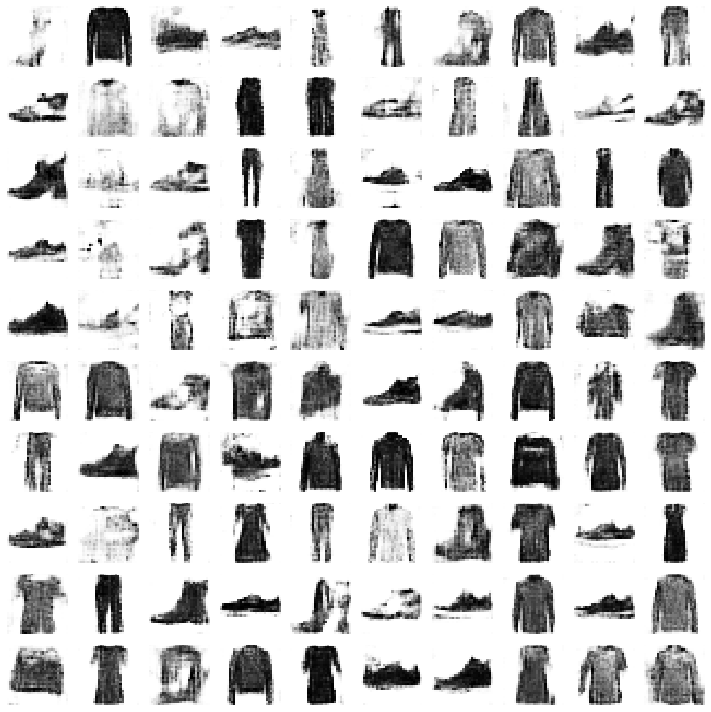

Performance of Epoch 40, c[0.004,100], d[0.778,0.843], g[1.039]

--------------- Epoch 41 ---------------


100%|██████████| 100/100 [06:34<00:00,  3.94s/it]


--------------- Epoch 42 ---------------


100%|██████████| 100/100 [06:33<00:00,  3.93s/it]


--------------- Epoch 43 ---------------


100%|██████████| 100/100 [06:32<00:00,  3.93s/it]


--------------- Epoch 44 ---------------


100%|██████████| 100/100 [06:33<00:00,  3.93s/it]


--------------- Epoch 45 ---------------


100%|██████████| 100/100 [06:32<00:00,  3.92s/it]


Prediction of fake examples -  [9 3 4 7 4 1 1 7 3 3 4 3 6 3 6 1 5 2 7 9 3 3 6 3 0 7 5 2 3 7 9 9 5 5 5 5 2
 5 1 9 1 8 9 7 3 3 9 3 2 5 9 9 7 3 2 3 9 7 0 9 5 3 2 3 5 7 3 4 3 7 3 3 1 0
 2 3 2 3 6 8 7 2 7 9 3 1 3 5 5 9 9 7 1 0 4 0 1 7 7 7] 100

Prediction by knn -  [9 4 6 7 4 1 1 7 3 3 6 4 6 4 0 1 5 2 7 6 4 3 6 0 2 9 7 2 3 7 9 9 7 7 5 5 2
 7 1 9 1 9 9 7 0 3 9 3 2 7 9 9 7 0 2 3 9 7 3 9 5 0 6 3 7 7 3 2 3 7 3 3 1 6
 2 4 6 6 6 2 7 2 7 7 0 1 3 7 7 9 9 7 1 0 4 0 1 7 9 7] 
shape= (100, 784)
knn Classifier Accuracy: 66.000%
distance= 7.6945653
len(lm)= 97
y -  [5 5 5 ... 1 6 6]
Prediction -  [5 9 5 ... 1 6 6]
Classifier Accuracy: 72.557%


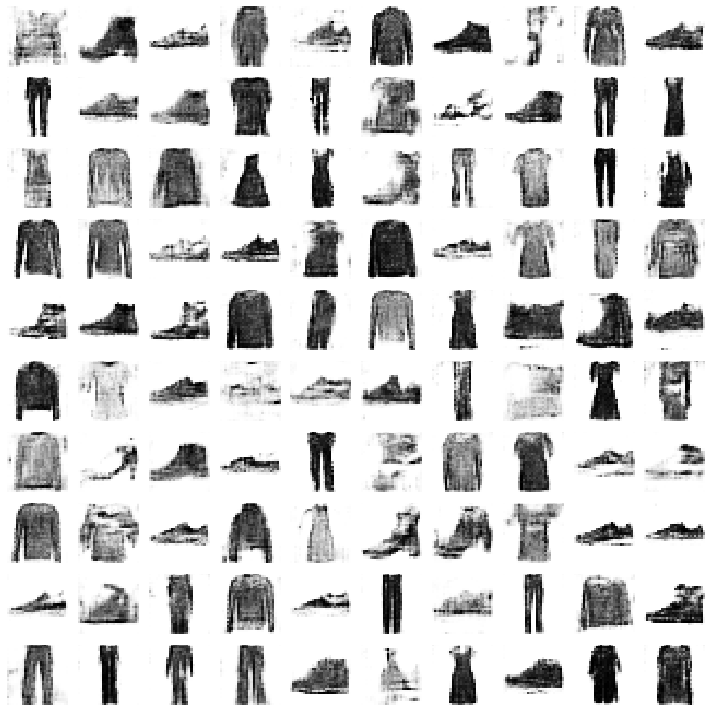

Performance of Epoch 45, c[0.005,100], d[0.719,0.772], g[0.969]

--------------- Epoch 46 ---------------


100%|██████████| 100/100 [06:32<00:00,  3.92s/it]


--------------- Epoch 47 ---------------


100%|██████████| 100/100 [06:33<00:00,  3.93s/it]


--------------- Epoch 48 ---------------


100%|██████████| 100/100 [06:29<00:00,  3.90s/it]


--------------- Epoch 49 ---------------


100%|██████████| 100/100 [06:30<00:00,  3.91s/it]


--------------- Epoch 50 ---------------


100%|██████████| 100/100 [06:31<00:00,  3.92s/it]


Prediction of fake examples -  [2 3 2 3 4 9 7 7 6 9 7 2 3 0 9 3 6 3 1 1 8 2 5 7 4 7 1 2 9 1 3 7 3 3 1 5 9
 2 7 3 7 0 3 3 7 3 9 3 3 4 5 5 1 9 7 3 7 7 3 7 9 3 4 7 4 9 2 3 1 2 2 3 7 8
 7 1 8 3 3 2 0 3 4 2 3 9 7 5 5 0 5 9 9 7 5 3 3 3 1 9] 100

Prediction by knn -  [2 3 2 3 1 9 7 7 6 9 7 2 3 0 9 6 6 0 1 1 8 2 7 7 2 7 1 2 9 1 3 7 3 3 1 7 9
 2 7 4 7 2 3 3 7 3 9 3 3 4 5 7 1 9 7 3 7 9 3 9 9 3 2 7 2 5 2 0 1 5 2 3 9 8
 7 1 2 3 3 2 6 3 2 2 3 5 7 7 7 0 5 9 9 7 5 3 3 3 1 9] 
shape= (100, 784)
knn Classifier Accuracy: 77.000%
distance= 6.8131676
len(lm)= 102
y -  [5 5 5 ... 1 6 6]
Prediction -  [5 9 5 ... 1 4 6]
Classifier Accuracy: 71.086%


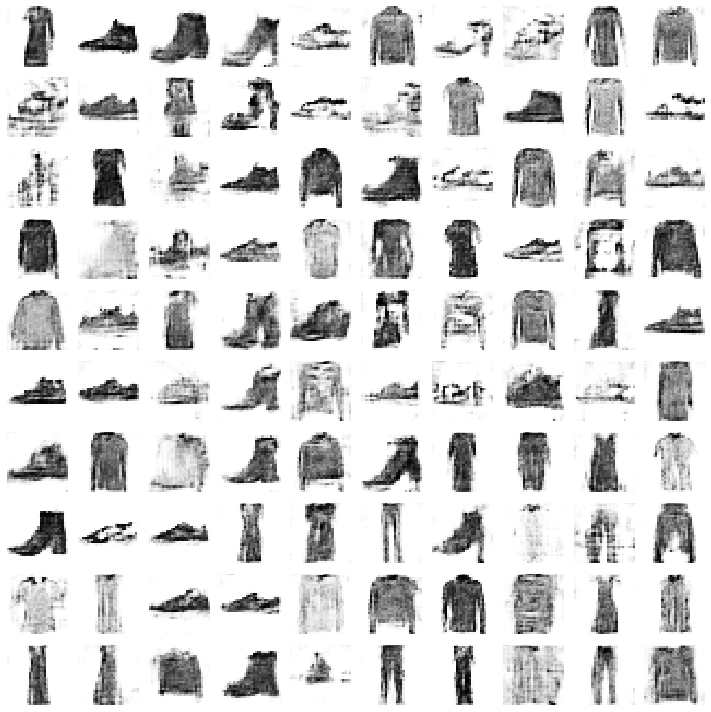

Performance of Epoch 50, c[0.006,100], d[0.761,0.753], g[1.065]

--------------- Epoch 51 ---------------


100%|██████████| 100/100 [06:33<00:00,  3.94s/it]


--------------- Epoch 52 ---------------


100%|██████████| 100/100 [06:33<00:00,  3.93s/it]


--------------- Epoch 53 ---------------


100%|██████████| 100/100 [06:35<00:00,  3.96s/it]


--------------- Epoch 54 ---------------


100%|██████████| 100/100 [06:35<00:00,  3.95s/it]


--------------- Epoch 55 ---------------


100%|██████████| 100/100 [06:36<00:00,  3.96s/it]


Prediction of fake examples -  [9 7 7 6 5 7 3 1 9 6 9 4 1 1 9 7 9 3 5 9 7 0 3 3 6 3 3 7 7 6 9 7 7 1 4 1 3
 3 0 7 1 4 1 1 1 7 1 9 2 1 6 7 1 9 5 1 4 9 5 7 9 4 4 9 2 1 6 4 4 6 6 3 9 1
 3 3 9 1 9 9 9 9 6 3 6 2 7 3 3 1 1 3 8 4 9 0 9 7 2 7] 100

Prediction by knn -  [7 7 9 6 8 7 3 1 9 6 9 2 1 1 9 7 9 6 7 9 7 0 3 0 6 6 0 9 8 6 7 7 6 1 2 1 3
 3 0 7 3 6 1 1 1 7 1 9 2 1 2 7 1 9 5 1 2 7 5 7 9 4 2 5 6 1 6 4 2 6 3 3 9 0
 3 3 9 4 9 7 2 9 6 3 6 2 7 3 3 1 0 4 9 6 9 0 9 7 4 7] 
shape= (100, 784)
knn Classifier Accuracy: 67.000%
distance= 8.120465
len(lm)= 107
y -  [5 5 5 ... 1 6 6]
Prediction -  [9 9 5 ... 1 4 6]
Classifier Accuracy: 69.185%


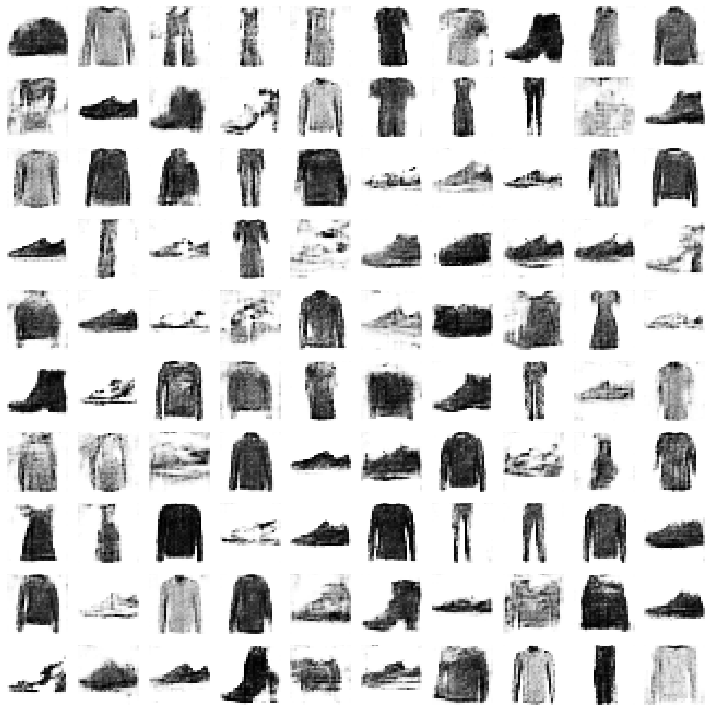

Performance of Epoch 55, c[0.004,100], d[0.663,0.930], g[1.057]

--------------- Epoch 56 ---------------


100%|██████████| 100/100 [06:37<00:00,  3.97s/it]


--------------- Epoch 57 ---------------


100%|██████████| 100/100 [06:36<00:00,  3.96s/it]


--------------- Epoch 58 ---------------


100%|██████████| 100/100 [06:34<00:00,  3.95s/it]


--------------- Epoch 59 ---------------


100%|██████████| 100/100 [06:33<00:00,  3.93s/it]


--------------- Epoch 60 ---------------


100%|██████████| 100/100 [06:34<00:00,  3.95s/it]


Prediction of fake examples -  [1 2 6 7 1 0 4 5 7 7 2 9 7 3 9 2 0 4 9 5 9 9 9 7 4 3 9 2 3 1 0 3 3 0 2 6 6
 3 3 7 3 7 1 4 6 5 2 3 2 7 5 0 0 0 4 7 3 5 9 0 7 6 6 4 3 7 7 7 9 5 2 2 7 7
 9 5 9 1 3 4 7 2 9 2 4 3 5 7 9 9 2 5 7 6 8 7 0 4 4 0] 100

Prediction by knn -  [1 2 6 7 1 6 2 5 7 9 2 9 7 4 9 2 0 2 9 5 9 9 9 7 4 0 5 2 3 1 0 0 3 0 2 6 6
 3 3 7 0 7 1 2 6 5 2 3 2 9 7 0 0 6 2 7 3 7 9 0 7 6 6 4 3 7 7 7 9 7 2 2 7 7
 9 5 9 1 6 2 7 2 9 2 2 3 7 7 5 9 2 5 7 6 6 7 8 6 2 0] 
shape= (100, 784)
knn Classifier Accuracy: 75.000%
distance= 8.118564
len(lm)= 116
y -  [5 5 5 ... 1 6 6]
Prediction -  [5 9 5 ... 1 4 6]
Classifier Accuracy: 70.573%


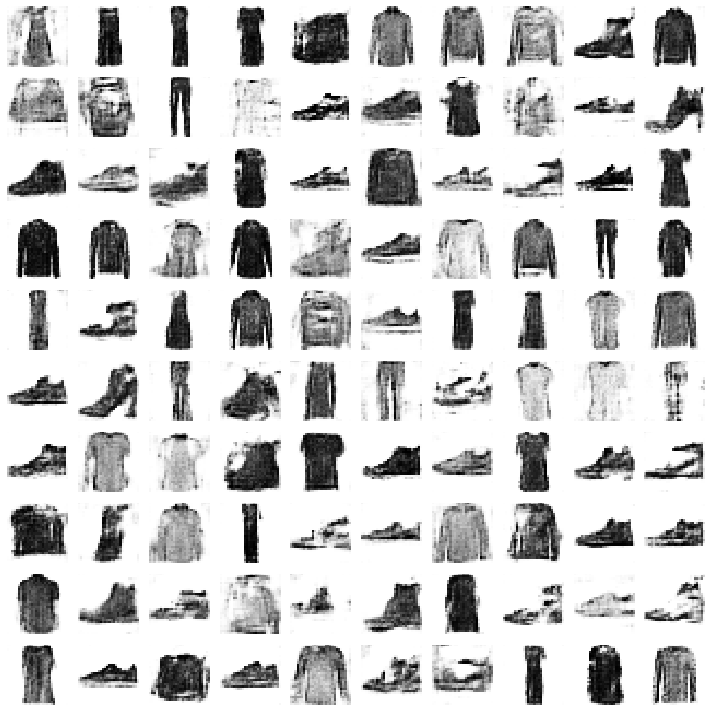

Performance of Epoch 60, c[0.003,100], d[0.805,0.676], g[0.997]

--------------- Epoch 61 ---------------


100%|██████████| 100/100 [06:35<00:00,  3.95s/it]


--------------- Epoch 62 ---------------


100%|██████████| 100/100 [06:36<00:00,  3.97s/it]


--------------- Epoch 63 ---------------


100%|██████████| 100/100 [06:36<00:00,  3.97s/it]


--------------- Epoch 64 ---------------


100%|██████████| 100/100 [06:36<00:00,  3.97s/it]


--------------- Epoch 65 ---------------


100%|██████████| 100/100 [06:35<00:00,  3.96s/it]


Prediction of fake examples -  [9 7 5 1 6 6 2 4 9 3 2 7 9 5 7 9 4 6 6 0 4 9 3 7 2 7 1 6 5 9 2 3 5 4 5 2 3
 4 2 0 7 9 7 7 9 7 4 3 4 6 4 4 9 3 4 2 9 6 2 0 1 7 9 2 7 3 7 4 7 9 1 9 7 7
 7 9 9 7 6 2 7 7 7 6 7 7 5 1 9 7 6 9 2 7 7 0 9 3 6 4] 100

Prediction by knn -  [9 7 9 1 6 6 2 4 9 0 4 7 9 7 7 9 2 6 6 0 2 5 3 7 2 7 3 6 7 5 2 0 6 3 7 2 3
 4 2 0 7 9 7 7 9 7 2 3 6 0 2 2 5 3 2 6 9 6 2 0 1 9 9 2 7 6 5 4 7 9 3 9 9 7
 7 9 9 5 0 2 7 7 7 6 7 9 5 1 9 9 4 5 6 7 9 0 5 3 3 2] 
shape= (100, 784)
knn Classifier Accuracy: 62.000%
distance= 8.302782
len(lm)= 123
y -  [5 5 5 ... 1 6 6]
Prediction -  [5 9 5 ... 1 4 6]
Classifier Accuracy: 69.207%


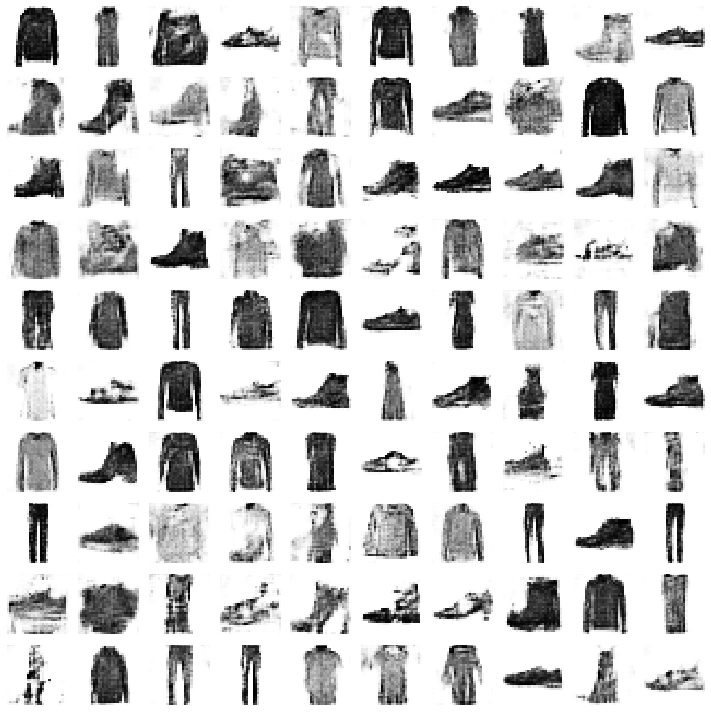

Performance of Epoch 65, c[0.002,100], d[0.809,0.819], g[1.060]

--------------- Epoch 66 ---------------


100%|██████████| 100/100 [06:36<00:00,  3.96s/it]


--------------- Epoch 67 ---------------


100%|██████████| 100/100 [06:34<00:00,  3.95s/it]


--------------- Epoch 68 ---------------


100%|██████████| 100/100 [06:34<00:00,  3.94s/it]


--------------- Epoch 69 ---------------


100%|██████████| 100/100 [06:33<00:00,  3.94s/it]


--------------- Epoch 70 ---------------


100%|██████████| 100/100 [06:34<00:00,  3.95s/it]


Prediction of fake examples -  [9 9 3 4 7 7 5 0 5 2 7 7 9 6 7 9 3 7 6 9 9 9 7 6 7 2 6 7 9 4 7 0 7 4 3 2 5
 4 6 5 9 9 3 4 2 0 7 9 1 9 7 4 6 4 9 8 3 0 7 6 1 3 0 7 9 1 9 4 9 7 2 6 4 0
 4 7 9 2 6 7 5 0 7 7 9 7 2 7 7 9 6 1 7 5 6 0 9 3 2 3] 100

Prediction by knn -  [9 9 3 2 7 2 7 0 5 2 7 7 5 1 7 9 3 7 3 9 9 9 7 3 7 2 2 5 9 3 7 0 7 2 3 6 5
 2 6 7 9 9 3 2 2 2 7 9 1 9 9 2 6 6 9 8 3 3 7 3 1 4 0 7 9 1 9 2 9 7 2 6 2 2
 2 7 9 2 6 7 7 0 7 9 9 7 6 7 7 5 0 1 7 7 6 0 5 3 2 3] 
shape= (100, 784)
knn Classifier Accuracy: 67.000%
distance= 9.701362
len(lm)= 129
y -  [5 5 5 ... 1 6 6]
Prediction -  [9 9 5 ... 1 4 6]
Classifier Accuracy: 69.674%


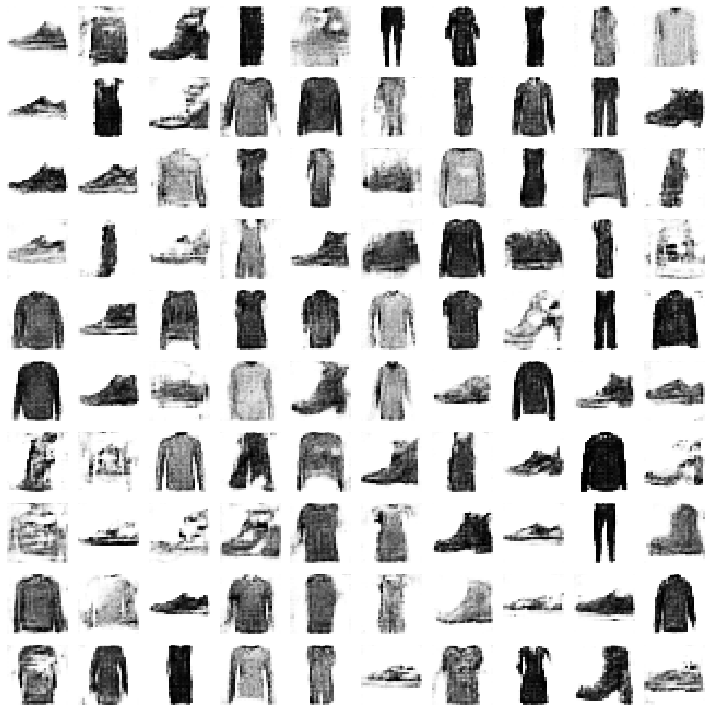

Performance of Epoch 70, c[0.002,100], d[0.720,0.692], g[1.174]

--------------- Epoch 71 ---------------


100%|██████████| 100/100 [06:36<00:00,  3.96s/it]


--------------- Epoch 72 ---------------


100%|██████████| 100/100 [06:37<00:00,  3.98s/it]


--------------- Epoch 73 ---------------


100%|██████████| 100/100 [06:36<00:00,  3.97s/it]


--------------- Epoch 74 ---------------


100%|██████████| 100/100 [06:38<00:00,  3.98s/it]


--------------- Epoch 75 ---------------


100%|██████████| 100/100 [06:36<00:00,  3.96s/it]


Prediction of fake examples -  [2 7 5 2 9 9 8 7 7 4 0 7 0 0 5 7 2 1 4 0 6 5 0 9 7 6 7 6 6 1 3 7 3 2 6 9 7
 7 7 7 2 5 7 7 1 6 5 3 1 9 7 6 7 9 2 4 0 4 9 6 5 7 7 7 9 3 3 3 6 7 9 5 1 5
 3 4 6 7 7 7 4 3 3 9 7 2 7 5 4 5 9 3 2 2 2 7 3 3 2 2] 100

Prediction by knn -  [2 7 5 2 9 9 8 7 7 1 2 7 2 6 5 7 2 1 2 6 6 5 0 7 7 6 7 6 6 1 3 6 3 2 6 5 9
 5 7 7 2 7 7 7 1 6 8 4 1 7 9 3 7 9 2 2 0 2 9 6 7 9 7 7 9 3 3 3 6 7 9 5 1 5
 4 4 6 7 7 5 2 3 6 9 5 2 7 5 6 9 2 6 2 2 2 2 3 3 2 2] 
shape= (100, 784)
knn Classifier Accuracy: 69.000%
distance= 13.497936
len(lm)= 133
y -  [5 5 5 ... 1 6 6]
Prediction -  [9 9 5 ... 1 4 6]
Classifier Accuracy: 70.096%


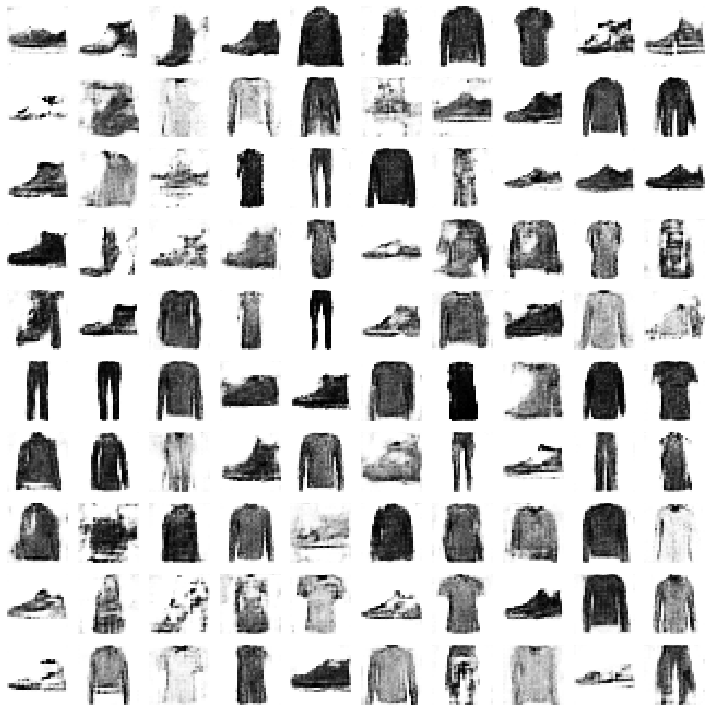

Performance of Epoch 75, c[0.002,100], d[0.897,0.838], g[1.091]

--------------- Epoch 76 ---------------


100%|██████████| 100/100 [06:37<00:00,  3.97s/it]


--------------- Epoch 77 ---------------


100%|██████████| 100/100 [06:36<00:00,  3.97s/it]


--------------- Epoch 78 ---------------


100%|██████████| 100/100 [06:37<00:00,  3.97s/it]


--------------- Epoch 79 ---------------


100%|██████████| 100/100 [06:36<00:00,  3.97s/it]


--------------- Epoch 80 ---------------


100%|██████████| 100/100 [06:35<00:00,  3.95s/it]


Prediction of fake examples -  [3 9 4 1 1 2 4 3 8 7 3 6 2 7 4 4 4 4 0 2 3 7 4 8 7 9 4 5 7 9 1 4 3 3 4 9 2
 2 6 2 3 3 4 5 5 0 1 3 3 3 7 7 7 5 0 3 9 3 7 1 4 3 5 5 4 1 9 4 3 3 3 9 6 3
 0 9 0 4 9 9 3 5 9 7 7 2 3 8 4 5 3 5 3 5 2 9 4 6 2 7] 100

Prediction by knn -  [0 9 6 3 1 2 2 3 0 7 3 6 2 7 4 2 4 6 0 6 3 7 4 8 9 9 4 5 7 9 1 2 3 1 6 9 4
 4 1 2 3 3 6 5 7 0 1 4 4 3 7 7 7 5 2 8 9 3 7 1 2 4 5 7 7 1 9 2 3 1 3 5 3 3
 0 9 0 4 9 6 3 5 9 7 7 4 3 8 4 5 3 5 0 7 2 9 4 6 6 7] 
shape= (100, 784)
knn Classifier Accuracy: 66.000%
distance= 7.0144486
len(lm)= 146
y -  [5 5 5 ... 1 6 6]
Prediction -  [9 9 5 ... 1 6 6]
Classifier Accuracy: 69.766%


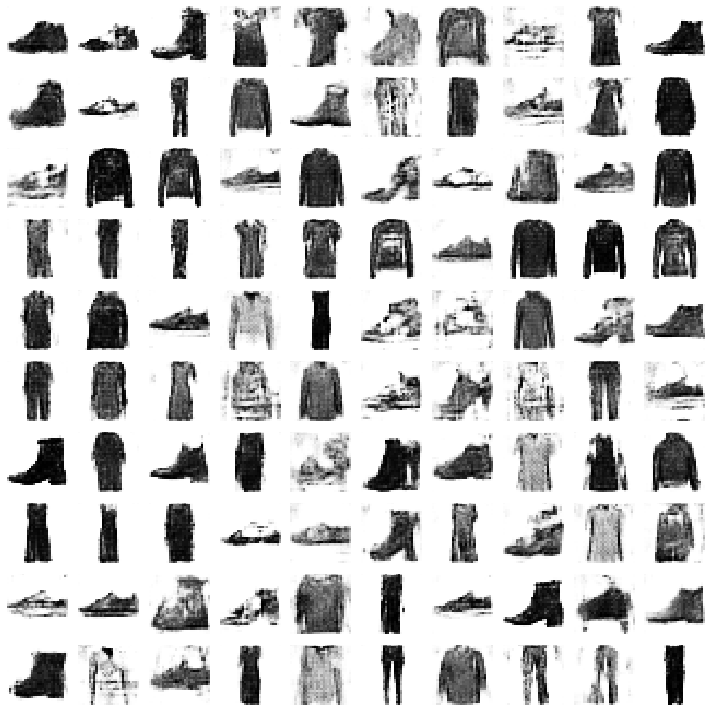

Performance of Epoch 80, c[0.003,100], d[0.691,0.705], g[1.018]

--------------- Epoch 81 ---------------


100%|██████████| 100/100 [06:36<00:00,  3.96s/it]


--------------- Epoch 82 ---------------


100%|██████████| 100/100 [06:37<00:00,  3.97s/it]


--------------- Epoch 83 ---------------


100%|██████████| 100/100 [06:35<00:00,  3.95s/it]


--------------- Epoch 84 ---------------


100%|██████████| 100/100 [06:32<00:00,  3.93s/it]


--------------- Epoch 85 ---------------


100%|██████████| 100/100 [06:34<00:00,  3.95s/it]


Prediction of fake examples -  [2 4 3 1 1 1 4 3 7 3 2 5 3 2 3 4 8 3 3 9 9 6 3 8 7 9 3 3 2 8 2 7 6 0 9 2 9
 0 2 7 2 3 7 3 3 9 4 7 7 5 7 8 9 9 4 4 3 2 3 7 3 9 5 7 3 0 2 2 3 7 3 1 3 9
 5 7 9 9 2 3 7 9 7 0 1 6 6 5 9 1 8 1 9 9 7 6 5 5 3 9] 100

Prediction by knn -  [2 6 1 1 1 3 3 3 7 0 2 5 0 2 3 4 8 3 3 9 5 6 0 8 7 9 3 0 4 8 9 7 6 0 9 2 9
 0 6 7 6 3 9 0 3 9 4 7 7 5 7 8 9 9 6 4 3 4 3 9 3 9 7 7 0 6 2 2 3 7 3 1 3 9
 5 7 9 7 2 3 7 9 7 0 1 6 6 5 9 3 8 1 9 9 7 6 7 7 3 9] 
shape= (100, 784)
knn Classifier Accuracy: 75.000%
distance= 7.712253
len(lm)= 157
y -  [5 5 5 ... 1 6 6]
Prediction -  [9 9 5 ... 1 4 6]
Classifier Accuracy: 70.483%


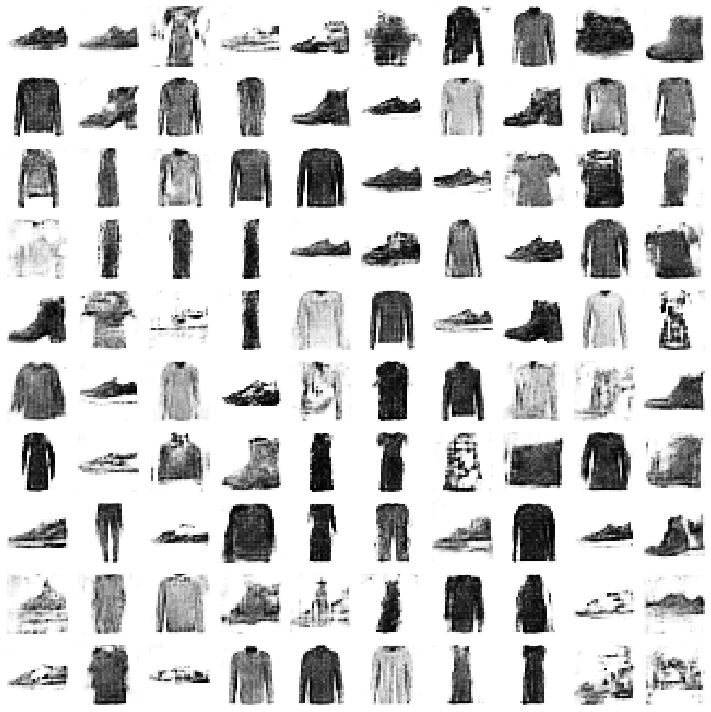

Performance of Epoch 85, c[0.001,100], d[0.827,0.747], g[0.916]

--------------- Epoch 86 ---------------


100%|██████████| 100/100 [06:38<00:00,  3.99s/it]


--------------- Epoch 87 ---------------


100%|██████████| 100/100 [06:37<00:00,  3.97s/it]


--------------- Epoch 88 ---------------


100%|██████████| 100/100 [06:35<00:00,  3.96s/it]


--------------- Epoch 89 ---------------


100%|██████████| 100/100 [06:34<00:00,  3.95s/it]


--------------- Epoch 90 ---------------


100%|██████████| 100/100 [06:34<00:00,  3.95s/it]


Prediction of fake examples -  [7 4 3 6 6 4 1 3 4 6 9 2 3 4 4 7 8 9 3 7 0 2 8 6 7 9 4 7 7 0 4 7 3 4 9 4 7
 3 7 1 5 6 3 0 9 9 9 4 1 2 6 9 1 7 3 5 4 7 0 4 4 7 3 1 4 6 9 7 7 8 3 4 4 6
 4 7 7 3 9 4 9 4 3 4 9 4 9 7 4 4 5 3 2 3 9 7 7 2 7 3] 100

Prediction by knn -  [9 2 3 2 6 6 1 0 2 2 9 2 9 2 8 5 2 9 1 7 0 6 8 0 7 5 6 7 7 0 4 7 3 4 9 2 7
 3 7 1 7 2 3 0 9 8 9 2 1 2 6 9 1 7 1 7 2 7 0 2 2 7 0 1 6 0 9 7 7 8 6 6 4 6
 6 7 8 3 8 2 9 2 1 6 9 2 9 7 4 6 7 3 2 1 9 7 7 6 7 3] 
shape= (100, 784)
knn Classifier Accuracy: 56.000%
distance= 12.513246
len(lm)= 167
y -  [5 5 5 ... 1 6 6]
Prediction -  [5 5 5 ... 1 4 6]
Classifier Accuracy: 70.561%


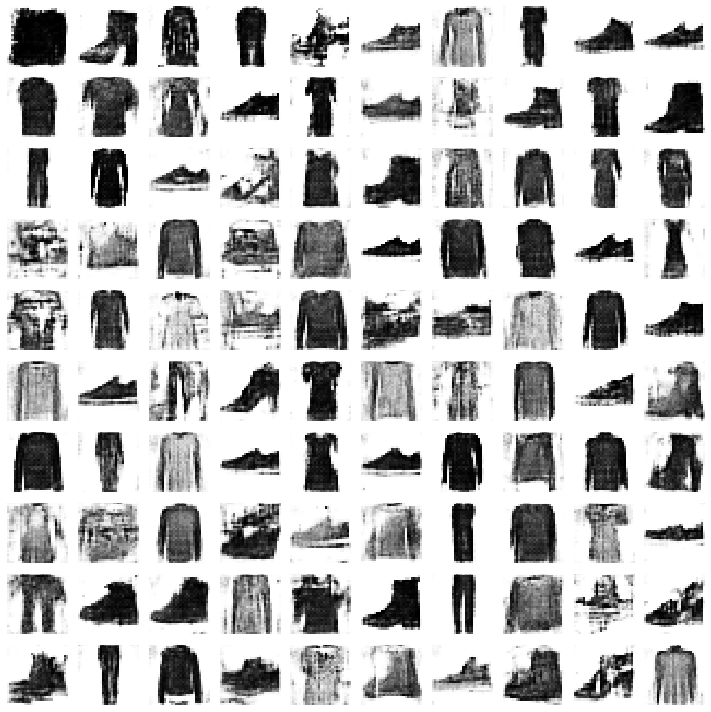

Performance of Epoch 90, c[0.001,100], d[1.275,0.958], g[1.106]

--------------- Epoch 91 ---------------


100%|██████████| 100/100 [06:32<00:00,  3.93s/it]


--------------- Epoch 92 ---------------


100%|██████████| 100/100 [06:31<00:00,  3.91s/it]


--------------- Epoch 93 ---------------


100%|██████████| 100/100 [06:32<00:00,  3.92s/it]


--------------- Epoch 94 ---------------


100%|██████████| 100/100 [06:35<00:00,  3.96s/it]


--------------- Epoch 95 ---------------


100%|██████████| 100/100 [06:31<00:00,  3.91s/it]


Prediction of fake examples -  [1 0 5 2 7 6 7 4 5 7 9 9 5 2 3 0 3 7 3 7 6 7 7 9 6 1 3 9 9 7 1 2 9 1 9 3 9
 2 1 0 0 0 7 7 5 7 0 4 5 8 7 2 3 2 0 4 7 6 7 3 4 2 4 3 7 7 4 9 2 6 7 2 0 1
 1 2 7 5 1 4 3 2 9 7 3 9 4 3 6 7 9 3 1 7 1 5 3 9 9 6] 100

Prediction by knn -  [1 2 5 2 7 6 7 2 7 7 9 9 7 2 3 0 3 7 3 4 6 7 7 9 6 1 7 9 3 7 1 6 9 3 9 1 9
 2 1 0 0 0 7 7 9 8 2 6 7 6 7 2 3 4 0 2 7 0 9 6 5 6 6 3 9 9 4 9 2 6 9 2 0 1
 1 2 5 7 1 4 1 2 9 7 3 9 6 3 6 7 9 3 1 7 1 7 2 9 9 3] 
shape= (100, 784)
knn Classifier Accuracy: 66.000%
distance= 7.9854193
len(lm)= 175
y -  [5 5 5 ... 1 6 6]
Prediction -  [5 9 5 ... 1 4 6]
Classifier Accuracy: 67.155%


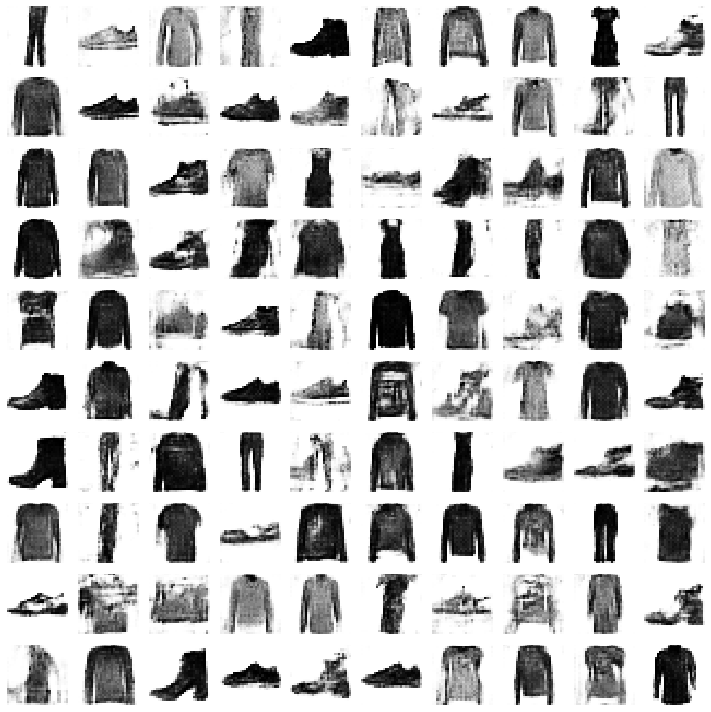

Performance of Epoch 95, c[0.005,100], d[0.799,0.779], g[1.010]

--------------- Epoch 96 ---------------


100%|██████████| 100/100 [06:33<00:00,  3.94s/it]


--------------- Epoch 97 ---------------


100%|██████████| 100/100 [06:34<00:00,  3.95s/it]


--------------- Epoch 98 ---------------


100%|██████████| 100/100 [06:35<00:00,  3.95s/it]


--------------- Epoch 99 ---------------


100%|██████████| 100/100 [06:35<00:00,  3.96s/it]


--------------- Epoch 100 ---------------


100%|██████████| 100/100 [06:35<00:00,  3.96s/it]


Prediction of fake examples -  [3 7 5 7 4 2 9 2 9 7 3 7 7 2 6 4 3 7 2 7 7 4 3 2 6 7 4 3 1 4 3 8 4 7 4 4 7
 1 9 7 9 4 1 4 1 1 4 9 7 7 7 2 3 0 3 3 6 6 4 3 0 7 3 9 3 3 7 3 9 7 3 3 9 9
 3 4 9 7 4 3 2 7 7 7 7 7 4 9 7 6 7 7 1 4 6 4 9 7 7 0] 100

Prediction by knn -  [1 5 5 7 4 6 9 2 9 7 1 6 7 2 2 6 3 7 2 7 7 6 3 4 6 7 4 1 1 2 3 2 4 7 2 6 7
 1 9 7 5 4 1 2 1 1 6 9 7 7 7 2 4 0 3 3 6 1 4 1 2 7 3 3 3 6 7 3 9 7 3 6 5 9
 3 4 5 7 0 3 2 7 7 7 8 7 4 9 7 6 7 7 1 6 6 4 9 7 7 6] 
shape= (100, 784)
knn Classifier Accuracy: 70.000%
distance= 8.198592
len(lm)= 184
y -  [5 5 5 ... 1 6 6]
Prediction -  [9 9 5 ... 1 6 6]
Classifier Accuracy: 70.166%


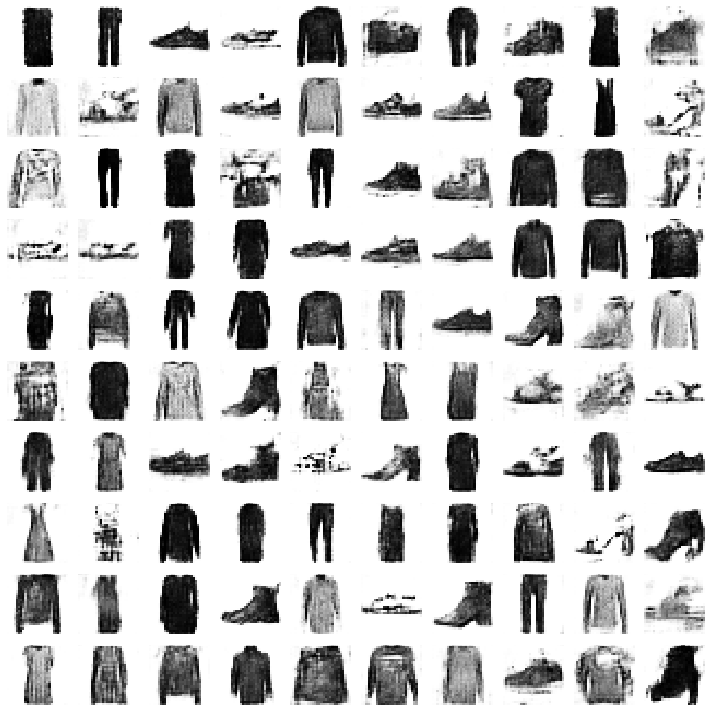

Performance of Epoch 100, c[0.002,100], d[0.657,1.088], g[0.896]



In [ ]:
from tqdm import tqdm
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import asarray
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Lambda
from keras.layers import Activation
from matplotlib import pyplot
from keras import backend
from sklearn.metrics import accuracy_score
lm=[]
classlabel=[]

def custom_activation(output):
	logexpsum = backend.sum(backend.exp(output), axis=-1, keepdims=True)
	result = logexpsum / (logexpsum + 1.0)
	return result

def define_discriminator(in_shape=(28,28,1), n_classes=10):
	
	in_image = Input(shape=in_shape)
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(in_image)
	fe = LeakyReLU(alpha=0.2)(fe)
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
	fe = LeakyReLU(alpha=0.2)(fe)
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
	fe = LeakyReLU(alpha=0.2)(fe)
	fe = Flatten()(fe)
	fe = Dropout(0.4)(fe)
	fe = Dense(n_classes)(fe)
	c_out_layer = Activation('softmax')(fe)
	c_model = Model(in_image, c_out_layer)
	c_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])
	
	d_out_layer = Lambda(custom_activation)(fe)
	d_model = Model(in_image, d_out_layer)
	d_model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
	return d_model, c_model

def define_generator(latent_dim):
	in_lat = Input(shape=(latent_dim,))
	n_nodes = 128 * 7 * 7
	gen = Dense(n_nodes)(in_lat)
	gen = LeakyReLU(alpha=0.2)(gen)
	gen = Reshape((7, 7, 128))(gen)
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
	gen = LeakyReLU(alpha=0.2)(gen)
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
	gen = LeakyReLU(alpha=0.2)(gen)
	out_layer = Conv2D(1, (7,7), activation='tanh', padding='same')(gen)
	
	model = Model(in_lat, out_layer)
	return model

def define_gan(g_model, d_model):
	d_model.trainable = False
	gan_output = d_model(g_model.output)
	model = Model(g_model.input, gan_output)
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

def load_real_samples(X,y):
  X=np.array(X)
  y=np.array(y)
  X = X.astype('float32')
  X = (X - 127.5) / 127.5
  X=X.reshape(X.shape[0],28,28,1)
  print(X.shape, y.shape)
  return [X, y]

def select_supervised_samples(dataset, n_samples=100, n_classes=10):
	X, y = dataset
	X_list, y_list = list(), list()
	n_per_class = int(n_samples / n_classes)
	for i in range(n_classes):
		X_with_class = X[y == i]
		ix = randint(0, len(X_with_class), n_per_class)
		[X_list.append(X_with_class[j]) for j in ix]
		[y_list.append(i) for j in ix]
	return asarray(X_list), asarray(y_list)

def generate_real_samples(dataset, n_samples):
	images, labels = dataset
	ix = randint(0, images.shape[0], n_samples)
	X, labels = images[ix], labels[ix]
	y = ones((n_samples, 1))
	return [X, labels], y

def generate_latent_points(latent_dim, n_samples):
	z_input = randn(latent_dim * n_samples)
	z_input = z_input.reshape(n_samples, latent_dim)
	return z_input

def generate_fake_samples(generator, latent_dim, n_samples):
	z_input = generate_latent_points(latent_dim, n_samples)
	images = generator.predict(z_input)
	y = zeros((n_samples, 1))
	return images, y

def summarize_performance(step, g_model, c_model, latent_dim, dataset, n_samples=100):
  X, _ = generate_fake_samples(g_model, latent_dim, n_samples)
  digit2 = c_model.predict(X)
  oo=np.argmax(digit2,axis=1)
  print("Prediction of fake examples - ",oo,len(np.argmax(digit2,axis=1)))
  u=X.reshape(X.shape[0],28,28)
  k=u
  for x in range(0,len(u)):
    for y in range(0,len(u[x])):
      for z in range(0,len(u[x][y])):
        m=u[x][y][z]
        k[x][y][z]=(int)((m)*127.5+127.5)
  k=np.int64(k)
  v=k.reshape(X.shape[0],784)
  X=(v.astype(np.float32) - 127.5)/127.5
  X=np.float32(X)
  zz=knn.predict(X.reshape(X.shape[0],784))
  print("\nPrediction by knn - ",zz,"\nshape=",X.shape)
  acc=accuracy_score(zz, np.argmax(digit2,axis=1))
  print('knn Classifier Accuracy: %.3f%%' % (acc * 100))
  distances, indices = knn.kneighbors(X.reshape(X.shape[0],784))
  
  for i in range(len(zz)):
    if zz[i]==oo[i] and (zz[i]==0 or zz[i]==4 or zz[i]==8) and distances[i][1]<20:
      lm.append(X.reshape(X.shape[0],784)[i])
      classlabel.append(zz[i])
  print("distance=",distances[10][1])
  print("len(lm)=",len(lm))

  X, y = dataset
  digit = c_model.predict(X)
  
  print("y - ",y)
  print("Prediction - ",np.argmax(digit,axis=1))
  
  _, acc = c_model.evaluate(X, y, verbose=0)
  print('Classifier Accuracy: %.3f%%' % (acc * 100))
 
def plot_graph(g_model, c_model, latent_dim, dataset, n_samples=100):
  X, _ = generate_fake_samples(g_model, latent_dim, n_samples)
  X = (X + 1) / 2.0
  u=X.reshape(X.shape[0],28,28)
  plt.figure(figsize=(10,10))
  for i in range(u.shape[0]):
    plt.subplot(10, 10, 1 + i)
    plt.imshow(u[i], interpolation='nearest', cmap='gray_r')
    plt.axis('off')
  plt.tight_layout()
  plt.show()
  plt.close()

def train(g_model, d_model, c_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=100):
  X_sup, y_sup = select_supervised_samples(dataset)
  print(X_sup.shape, y_sup.shape)
  bat_per_epo = int(dataset[0].shape[0] / n_batch)
  n_steps = bat_per_epo * n_epochs
  half_batch = int(n_batch / 2)
  #print('n_epochs=%d, n_batch=%d, 1/2=%d, b/e=%d, steps=%d' % (n_epochs, n_batch, half_batch, bat_per_epo, n_steps))
  
  for i in range(n_epochs+1):
    print('-'*15, 'Epoch %d' % i, '-'*15)
    for _ in tqdm(range(100)):
      [Xsup_real, ysup_real], _ = generate_real_samples([X_sup, y_sup], half_batch)
      c_loss, c_acc = c_model.train_on_batch(Xsup_real, ysup_real)
      [X_real, _], y_real = generate_real_samples(dataset, half_batch)
      d_loss1 = d_model.train_on_batch(X_real, y_real)
      X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
      d_loss2 = d_model.train_on_batch(X_fake, y_fake)
      X_gan, y_gan = generate_latent_points(latent_dim, n_batch), ones((n_batch, 1))
      g_loss = gan_model.train_on_batch(X_gan, y_gan)

    if i % 5 == 0:
      summarize_performance(i, g_model, c_model, latent_dim, dataset)
      plot_graph(g_model, c_model, latent_dim, dataset)
      print('Performance of Epoch %d, c[%.3f,%.0f], d[%.3f,%.3f], g[%.3f]\n' % (i, c_loss, c_acc*100, d_loss1, d_loss2, g_loss))
    

latent_dim = 100
d_model, c_model = define_discriminator()
g_model = define_generator(latent_dim)
gan_model = define_gan(g_model, d_model)
dataset = load_real_samples(X_train,y_train)
train(g_model, d_model, c_model, gan_model, dataset, latent_dim)

In [ ]:
c_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       1280      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         147584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         147584    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 4, 4, 128)         0     

In [ ]:
d_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       1280      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         147584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         147584    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 4, 4, 128)         0   

In [ ]:
g_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_1 (Dense)             (None, 6272)              633472    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 128)      262272    
 nspose)                                                         
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                           

In [ ]:
gan_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_1 (Dense)             (None, 6272)              633472    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 128)      262272    
 nspose)                                                         
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                           

Selected Generated images based on KNN criteria

In [ ]:
b=pd.DataFrame(lm)
b

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,-0.890196,-0.976471,-0.992157,-0.976471,-0.717647,-0.482353,-0.098039,0.058824,0.262745,0.262745,0.231373,0.325490,0.333333,0.364706,0.207843,0.341176,0.152941,0.090196,-0.278431,-0.192157,-0.270588,-0.309804,-0.623529,-0.600000,-0.843137,-0.945098,-0.937255,-0.890196,-0.952941,-1.000000,-1.0,-0.992157,-0.866667,-0.474510,-0.333333,0.262745,0.435294,0.435294,0.325490,0.537255,...,0.529412,0.576471,0.372549,0.498039,0.200000,0.074510,-0.592157,-0.521569,-0.921569,-0.984314,-0.984314,-0.976471,-0.827451,-0.952941,-0.984314,-0.929412,-0.788235,-0.560784,-0.513726,-0.066667,0.160784,0.262745,0.176471,0.356863,0.411765,0.380392,0.270588,0.349020,0.396078,0.380392,0.215686,0.270588,0.113725,-0.105882,-0.560784,-0.505882,-0.811765,-0.945098,-0.968627,-0.905882
1,-0.913725,-0.984314,-1.000000,-0.992157,-0.929412,-0.905882,-0.796078,-0.709804,-0.341176,-0.223529,-0.035294,0.066667,0.176471,0.215686,0.113725,0.215686,0.035294,0.019608,-0.498039,-0.427451,-0.756863,-0.866667,-0.960784,-0.952941,-0.960784,-0.984314,-0.952941,-0.913725,-0.968627,-1.000000,-1.0,-1.000000,-0.984314,-0.952941,-0.945098,-0.701961,-0.325490,-0.152941,-0.145098,0.215686,...,-0.105882,-0.309804,-0.576471,-0.356863,-0.098039,0.043137,-0.090196,0.168627,-0.380392,-0.631373,-0.803922,-0.780392,-0.882353,-0.984314,-0.992157,-0.960784,-0.835294,-0.482353,-0.521569,-0.207843,-0.356863,-0.498039,-0.615686,-0.349020,-0.082353,0.145098,-0.011765,0.129412,-0.168627,-0.435294,-0.639216,-0.443137,-0.270588,-0.121569,-0.270588,0.011765,-0.254902,-0.584314,-0.756863,-0.647059
2,-0.843137,-0.960784,-0.992157,-0.984314,-0.921569,-0.921569,-0.890196,-0.882353,-0.788235,-0.796078,-0.796078,-0.788235,-0.788235,-0.843137,-0.858824,-0.827451,-0.741176,-0.756863,-0.827451,-0.811765,-0.858824,-0.905882,-0.968627,-0.968627,-0.976471,-0.992157,-0.984314,-0.960784,-0.929412,-0.992157,-1.0,-1.000000,-0.984314,-0.968627,-0.976471,-0.913725,-0.890196,-0.890196,-0.945098,-0.858824,...,-0.952941,-0.984314,-0.992157,-0.984314,-0.788235,-0.576471,-0.333333,-0.145098,-0.694118,-0.866667,-0.929412,-0.905882,-0.874510,-0.984314,-0.992157,-0.952941,-0.701961,-0.090196,-0.215686,0.035294,-0.396078,-0.741176,-0.882353,-0.749020,-0.631373,-0.450980,-0.764706,-0.686275,-0.921569,-0.976471,-0.992157,-0.960784,-0.890196,-0.654902,-0.678431,-0.341176,-0.615686,-0.827451,-0.913725,-0.803922
3,-0.803922,-0.921569,-0.976471,-0.968627,-0.945098,-0.945098,-0.945098,-0.937255,-0.874510,-0.874510,-0.858824,-0.827451,-0.835294,-0.898039,-0.898039,-0.866667,-0.756863,-0.780392,-0.796078,-0.772549,-0.772549,-0.796078,-0.882353,-0.850980,-0.890196,-0.952941,-0.929412,-0.890196,-0.890196,-0.984314,-1.0,-0.992157,-0.984314,-0.984314,-0.992157,-0.968627,-0.945098,-0.937255,-0.968627,-0.898039,...,-0.858824,-0.937255,-0.952941,-0.913725,-0.717647,-0.576471,-0.372549,-0.098039,-0.301961,-0.498039,-0.654902,-0.654902,-0.811765,-0.952941,-0.984314,-0.929412,-0.788235,-0.458824,-0.592157,-0.356863,-0.639216,-0.796078,-0.921569,-0.850980,-0.835294,-0.772549,-0.874510,-0.741176,-0.843137,-0.905882,-0.952941,-0.858824,-0.780392,-0.607843,-0.639216,-0.239216,-0.356863,-0.505882,-0.678431,-0.560784
4,-0.780392,-0.905882,-0.976471,-0.968627,-0.945098,-0.945098,-0.968627,-0.968627,-0.952941,-0.968627,-0.968627,-0.960784,-0.960784,-0.976471,-0.984314,-0.984314,-0.952941,-0.952941,-0.945098,-0.937255,-0.937255,-0.960784,-0.952941,-0.929412,-0.835294,-0.850980,-0.772549,-0.709804,-0.874510,-0.976471,-1.0,-0.992157,-0.984314,-0.984314,-1.000000,-0.992157,-0.992157,-0.992157,-1.000000,-0.992157,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.960784,-0.890196,-0.552941,-0.380392,-0.474510,-0.568627,-0.670588,-0.639216,-0.756863,-0.929412,-0.968627,-0.882353,-0.592157

Converting [-1 to 1] back to pixels [0-255]

In [ ]:
def pix(x):
  x=x*127.5+127.5
  x=round(x)
  x=x.astype(int)
  return x

b=b.apply(pix)
b

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,14,3,1,3,36,66,115,135,161,161,157,169,170,174,154,171,147,139,92,103,93,88,48,51,20,7,8,14,6,0,0,1,17,67,85,161,183,183,169,196,...,195,201,175,191,153,137,52,61,10,2,2,3,22,6,2,9,27,56,62,119,148,161,150,173,180,176,162,172,178,176,155,162,142,114,56,63,24,7,4,12
1,11,2,0,1,9,12,26,37,84,99,123,136,150,155,142,155,132,130,64,73,31,17,5,6,5,2,6,11,4,0,0,0,2,6,7,38,86,108,109,155,...,114,88,54,82,115,133,116,149,79,47,25,28,15,2,1,5,21,66,61,101,82,64,49,83,117,146,126,144,106,72,46,71,93,112,93,129,95,53,31,45
2,20,5,1,2,10,10,14,15,27,26,26,27,27,20,18,22,33,31,22,24,18,12,4,4,3,1,2,5,9,1,0,0,2,4,3,11,14,14,7,18,...,6,2,1,2,27,54,85,109,39,17,9,12,16,2,1,6,38,116,100,132,77,33,15,32,47,70,30,40,10,3,1,5,14,44,41,84,49,22,11,25
3,25,10,3,4,7,7,7,8,16,16,18,22,21,13,13,17,31,28,26,29,29,26,15,19,14,6,9,14,14,2,0,1,2,2,1,4,7,8,4,13,...,18,8,6,11,36,54,80,115,89,64,44,44,24,6,2,9,27,69,52,82,46,26,10,19,21,29,16,33,20,12,6,18,28,50,46,97,82,63,41,56
4,28,12,3,4,7,7,4,4,6,4,4,5,5,3,2,2,6,6,7,8,8,5,6,9,21,19,29,37,16,3,0,1,2,2,0,1,1,1,0,1,...,0,0,0,0,5,14,57,79,67,55,42,46,31,9,4,15,52,120,72,71,12,2,0,1,1,3,1,5,1,0,0,1,3,16,21,68,55,48,33,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0,0,0,0,0,0,0,0,0,6,7,5,15,5,2,3,4,1,2,3,2,1,0,0,0,0,0,1,0,0,0,0,0,0,8,94,78,89,44,72,...,50,45,37,23,60,74,0,0,0,0,0,0,0,0,0,0,0,0,0,3,40,11,11,19,38,23,18,29,23,19,15,8,8,3,0,0,0,14,58,14
180,0,0,0,0,7,8,8,1,0,0,1,21,8,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,12,20,15,11,6,1,86,183,...,0,0,0,0,0,103,223,176,109,0,0,0,0,0,0,0,10,124,111,8,0,0,0,0,0,0,0,0,0,0,0,0,0,28,126,91,22,0,0,0
181,0,0,0,0,0,0,0,0,0,0,0,25,112,152,77,35,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,72,222,...,233,235,209,189,21,134,217,213,125,0,0,0,0,0,2,73,96,186,28,1,2,9,31,46,90,103,92,75,54,16,6,6,2,27,75,60,16,0,0,0
182,0,0,0,0,0,0,0,0,0,0,0,2,201,219,187,97,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,236,...,248,246,228,224,19,183,254,251,248,0,0,0,0,0,0,7,205,249,237,0,0,1,4,9,21,17,8,4,4,0,0,0,0,27,241,245,200,0,0,0


In [ ]:
b['labels']=classlabel
b

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,labels
0,14,3,1,3,36,66,115,135,161,161,157,169,170,174,154,171,147,139,92,103,93,88,48,51,20,7,8,14,6,0,0,1,17,67,85,161,183,183,169,196,...,201,175,191,153,137,52,61,10,2,2,3,22,6,2,9,27,56,62,119,148,161,150,173,180,176,162,172,178,176,155,162,142,114,56,63,24,7,4,12,0
1,11,2,0,1,9,12,26,37,84,99,123,136,150,155,142,155,132,130,64,73,31,17,5,6,5,2,6,11,4,0,0,0,2,6,7,38,86,108,109,155,...,88,54,82,115,133,116,149,79,47,25,28,15,2,1,5,21,66,61,101,82,64,49,83,117,146,126,144,106,72,46,71,93,112,93,129,95,53,31,45,4
2,20,5,1,2,10,10,14,15,27,26,26,27,27,20,18,22,33,31,22,24,18,12,4,4,3,1,2,5,9,1,0,0,2,4,3,11,14,14,7,18,...,2,1,2,27,54,85,109,39,17,9,12,16,2,1,6,38,116,100,132,77,33,15,32,47,70,30,40,10,3,1,5,14,44,41,84,49,22,11,25,4
3,25,10,3,4,7,7,7,8,16,16,18,22,21,13,13,17,31,28,26,29,29,26,15,19,14,6,9,14,14,2,0,1,2,2,1,4,7,8,4,13,...,8,6,11,36,54,80,115,89,64,44,44,24,6,2,9,27,69,52,82,46,26,10,19,21,29,16,33,20,12,6,18,28,50,46,97,82,63,41,56,8
4,28,12,3,4,7,7,4,4,6,4,4,5,5,3,2,2,6,6,7,8,8,5,6,9,21,19,29,37,16,3,0,1,2,2,0,1,1,1,0,1,...,0,0,0,5,14,57,79,67,55,42,46,31,9,4,15,52,120,72,71,12,2,0,1,1,3,1,5,1,0,0,1,3,16,21,68,55,48,33,55,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0,0,0,0,0,0,0,0,0,6,7,5,15,5,2,3,4,1,2,3,2,1,0,0,0,0,0,1,0,0,0,0,0,0,8,94,78,89,44,72,...,45,37,23,60,74,0,0,0,0,0,0,0,0,0,0,0,0,0,3,40,11,11,19,38,23,18,29,23,19,15,8,8,3,0,0,0,14,58,14,0
180,0,0,0,0,7,8,8,1,0,0,1,21,8,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,12,20,15,11,6,1,86,183,...,0,0,0,0,103,223,176,109,0,0,0,0,0,0,0,10,124,111,8,0,0,0,0,0,0,0,0,0,0,0,0,0,28,126,91,22,0,0,0,4
181,0,0,0,0,0,0,0,0,0,0,0,25,112,152,77,35,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,72,222,...,235,209,189,21,134,217,213,125,0,0,0,0,0,2,73,96,186,28,1,2,9,31,46,90,103,92,75,54,16,6,6,2,27,75,60,16,0,0,0,4
182,0,0,0,0,0,0,0,0,0,0,0,2,201,219,187,97,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,236,...,246,228,224,19,183,254,251,248,0,0,0,0,0,0,7,205,249,237,0,0,1,4,9,21,17,8,4,4,0,0,0,0,27,241,245,200,0,0,0,4


Making the imbalanced dataset balanced by adding the generated images of minority classes (0,4,8) by semi-GAN to the original dataset

In [ ]:
count=Counter(d['labels'])
a={}
max=7000
for x in count:
  if count[x]<max:
    a[x]=max-count[x]
a

{0: 6131, 4: 6131, 8: 6131}

In [ ]:
from numpy.random import randint
la=[]
for i in a:
  X_with_class = b[b['labels'] == i]
  ix = randint(0, len(X_with_class), a[i])
  [la.append(X_with_class.iloc[j]) for j in ix]

In [ ]:
la=pd.DataFrame(la)
la

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,labels
103,0,0,0,0,0,0,0,8,21,13,26,13,5,4,1,2,7,8,7,9,6,2,0,0,0,0,0,0,0,0,0,0,4,11,11,94,188,81,110,92,...,6,4,17,0,0,0,0,0,0,3,12,0,0,0,0,0,0,0,1,7,6,11,2,0,0,0,1,3,0,0,1,0,0,0,0,0,0,1,4,0
97,0,0,0,0,0,6,3,46,23,6,11,34,90,123,165,218,232,118,29,16,16,4,1,0,0,0,0,0,0,0,0,0,1,36,30,190,79,15,14,59,...,17,13,15,22,9,5,0,0,0,0,0,8,0,4,20,30,26,104,125,70,11,8,28,45,102,28,26,56,14,23,32,55,4,2,0,0,0,0,0,0
76,9,16,26,9,12,8,10,12,15,31,85,87,19,7,5,5,11,26,17,10,21,10,31,8,21,4,6,9,1,2,3,2,4,18,52,49,57,78,179,201,...,96,134,69,13,9,0,0,0,0,0,5,0,0,0,1,0,0,0,4,23,23,60,64,93,94,74,113,140,80,90,61,10,0,0,0,0,0,0,6,0
32,0,0,0,0,0,0,1,10,16,13,20,64,64,49,53,44,33,15,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,31,68,59,112,187,...,73,137,141,32,22,6,0,0,0,0,0,0,0,0,0,0,0,0,3,19,16,20,38,71,70,71,78,50,27,39,43,6,1,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,8,24,31,47,47,19,6,2,5,40,121,70,70,98,7,1,0,0,0,0,2,0,0,0,0,0,1,134,248,253,248,246,235,...,230,222,197,231,113,0,0,0,0,0,0,0,0,0,0,0,0,23,52,87,147,78,65,56,71,63,114,96,118,127,80,155,104,3,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6,8,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,2,11,16,1,0,0,0,0,0,0,0,0,0,1,2,0,1,5,3,0,0,0,0,0,0,0,3,13,6,8
85,0,0,0,0,0,0,0,0,1,0,4,15,21,34,19,75,89,67,19,7,7,1,0,0,0,0,0,1,0,0,0,0,0,1,8,24,22,5,9,7,...,0,0,0,0,0,7,144,6,0,1,4,0,6,29,4,21,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,34,144,15,0,0,0,8
143,23,10,6,16,17,37,25,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,15,16,31,25,60,19,1,0,0,0,0,...,0,0,0,0,0,0,0,2,2,0,0,7,4,2,7,6,7,20,21,29,1,1,0,0,0,0,0,0,0,0,0,0,0,1,5,16,6,0,0,8
156,0,0,0,0,0,0,0,2,4,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,2,0,0,0,0,0,0,13,10,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,7,3,0,1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [ ]:
d=pd.concat([d,la])

In [ ]:
Counter(d['labels'])

Counter({0: 7000,
         1: 7000,
         2: 7000,
         3: 7000,
         4: 7000,
         5: 7000,
         6: 7000,
         7: 7000,
         8: 7000,
         9: 7000})

# Decision tree classifier on the balanced fashion dataset by SGAN
Decision tree classifier is built to compare GAN and SMOTE oversampling algorithms

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1)

X=d.iloc[:,:-1]
y=d.iloc[:,-1]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1, stratify=y )

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

clf.fit(X_train_std, y_train)
pred = clf.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != pred).sum())

from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, pred))

Misclassified examples: 985
Accuracy: 0.930


# Inference

Therefore, from the above results, we can conclude that SGAN provides a better result than SMOTE and the generated images by SGAN are clearer and sharper than that of SMOTE's. Further, the Decision tree classifier built on the balanced dataset generated by SGAN and SMOTE, the former SGAN results in 93% accuracy and SMOTE results in 90.3% 